In [1]:
import glob
import re
import pandas as pd

In [2]:
def load_hogar_ccaa_data(
    path_pattern: str = '../../datamarts/picotaData/hogarCCAA*.tsv',
    sort_by_ccaa: bool = True,
    ccaa_column_name: str = 'ccaa'
) -> pd.DataFrame:
    """
    Lee todos los ficheros TSV de hogares por CCAA, añade una columna con el código
    de CCAA extraído del nombre de fichero, concatena todo en un único DataFrame y
    opcionalmente ordena por CCAA.

    Parameters
    ----------
    path_pattern : str
        Patrón glob para localizar los archivos (por defecto '../../datamarts/picotaData/hogarCCAA*.tsv').
    sort_by_ccaa : bool
        Si True, ordena el DataFrame resultante por la columna de CCAA.
    ccaa_column_name : str
        Nombre de la columna donde se almacenará el código de CCAA.

    Returns
    -------
    pd.DataFrame
        DataFrame con todos los datos concatenados y la columna de CCAA.
    """
    files = glob.glob(path_pattern)
    dfs = []

    for fp in files:
        m = re.search(r'hogarCCAA(\d+)\.tsv$', fp)
        if not m:
            continue
        code = m.group(1).zfill(2)  # si quieres siempre dos dígitos, ojo

        df = pd.read_csv(fp, sep='\t')
        df[ccaa_column_name] = code
        dfs.append(df)

    if not dfs:
        raise FileNotFoundError(f"No se encontraron archivos con patrón {path_pattern}")

    big_df = pd.concat(dfs, ignore_index=True)

    if sort_by_ccaa:
        big_df.sort_values(ccaa_column_name, inplace=True)

    return big_df



In [3]:
df = load_hogar_ccaa_data()
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
df.head()

timestamp  capitalProvincia  tamanoMunicipio  densidad  \
0      2006-01-01T00:00:00                 0                3         1   
23535  2017-01-01T00:00:00                 1                5         3   
23534  2017-01-01T00:00:00                 0                2         2   
23533  2017-01-01T00:00:00                 0                2         2   
23532  2017-01-01T00:00:00                 0                2         1   

       superficie  aguaCaliente  calefaccion  zonaResidencial  \
0            90.0             1            0                5   
23535        64.0             1            0                5   
23534        90.0             1            1                5   
23533       135.0             1            1                6   
23532        95.0             1            0                1   

       regimenTenencia  comidasTotales  miembros:ocupados  \
0                    6            68.0                3.0   
23535                6            36.0                0.0   
23534                6           104.0                2.0   
23533                6            32.0                0.0   
23532                6            26.0                0.0   

       miembros:noOcupados  miembros:activos  miembros:noActivos  \
0                        2               3.0                   2   
23535                    1               0.0                   1   
23534                    2               2.0                   2   
23533                    3               2.0                   1   
23532                    1               0.0                   1   

       miembros:ancianos:masculinos  miembros:ancianos:femeninos  \
0                                 0                            0   
23535                             0                            1   
23534                             0                            0   
23533                             0                            0   
23532                             0                            1   

       miembros:adultos:masculinos  miembros:adultos:femeninos  \
0                                0                           2   
23535                            0                           0   
23534                            1                           1   
23533                            2                           1   
23532                            0                           0   

       miembros:niños:femeninos  miembros:niños:masculinos  \
0                             1                          2   
23535                         0                          0   
23534                         0                          2   
23533                         0                          0   
23532                         0                          0   

       miembros:conIngresos:masculinos  miembros:conIngresos:femeninos  \
0                                    2                               1   
23535                                0                               1   
23534                                1                               1   
23533                                1                               0   
23532                                0                               1   

       miembros:sinIngresos:masculinos  miembros:sinIngresos:femeninos  \
0                                    0                               2   
23535                                0                               0   
23534                                2                               0   
23533                                1                               1   
23532                                0                               0   

       edadSp  espanolSp  educacionSuperiorSp fuentePrincipalIngresos  \
0          47          1                    0              asalariado   
23535      73          1                    0                 pension   
23534      41          1                    1              asalariado   
23533      63          1              

Convertimos en dummies las variables categoricas

In [4]:
df = pd.get_dummies(df, columns=['ccaa', 'fuentePrincipalIngresos'], prefix=['ccaa', 'fuentePrincipalIngresos'])

# Renombrar las columnas de CCAA para que tengan un formato más amigable
df.rename(columns=lambda x: re.sub(r'^ccaa_(\d+)$', r'ccaa_\1', x), inplace=True)
# Renombrar las columnas de fuentePrincipalIngresos para que tengan un formato más amigable
df.rename(columns=lambda x: re.sub(r'^fuentePrincipalIngresos_(\d+)$', r'fuentePrincipalIngresos_\1', x), inplace=True)


In [5]:
df.head(
)

timestamp  capitalProvincia  tamanoMunicipio  densidad  \
0      2006-01-01T00:00:00                 0                3         1   
23535  2017-01-01T00:00:00                 1                5         3   
23534  2017-01-01T00:00:00                 0                2         2   
23533  2017-01-01T00:00:00                 0                2         2   
23532  2017-01-01T00:00:00                 0                2         1   

       superficie  aguaCaliente  calefaccion  zonaResidencial  \
0            90.0             1            0                5   
23535        64.0             1            0                5   
23534        90.0             1            1                5   
23533       135.0             1            1                6   
23532        95.0             1            0                1   

       regimenTenencia  comidasTotales  miembros:ocupados  \
0                    6            68.0                3.0   
23535                6            36.0                0.0   
23534                6           104.0                2.0   
23533                6            32.0                0.0   
23532                6            26.0                0.0   

       miembros:noOcupados  miembros:activos  miembros:noActivos  \
0                        2               3.0                   2   
23535                    1               0.0                   1   
23534                    2               2.0                   2   
23533                    3               2.0                   1   
23532                    1               0.0                   1   

       miembros:ancianos:masculinos  miembros:ancianos:femeninos  \
0                                 0                            0   
23535                             0                            1   
23534                             0                            0   
23533                             0                            0   
23532                             0                            1   

       miembros:adultos:masculinos  miembros:adultos:femeninos  \
0                                0                           2   
23535                            0                           0   
23534                            1                           1   
23533                            2                           1   
23532                            0                           0   

       miembros:niños:femeninos  miembros:niños:masculinos  \
0                             1                          2   
23535                         0                          0   
23534                         0                          2   
23533                         0                          0   
23532                         0                          0   

       miembros:conIngresos:masculinos  miembros:conIngresos:femeninos  \
0                                    2                               1   
23535                                0                               1   
23534                                1                               1   
23533                                1                               0   
23532                                0                               1   

       miembros:sinIngresos:masculinos  miembros:sinIngresos:femeninos  \
0                                    0                               2   
23535                                0                               0   
23534                                2                               0   
23533                                1                               1   
23532                                0                               0   

       edadSp  espanolSp  educacionSuperiorSp  numeroViviendasAdicionales  \
0          47          1                    0                         0.0   
23535      73          1                    0                         0.0   
23534      41          1                    1                         0.0   
23533      63         

In [6]:
output_columns = [col for col in df.columns if col.startswith("gastoMonetario:")]


## Analísis de sensibilidad no lineal por código

### 🗂 Categorías por código (Super_Categoría)

| Código | Categoría                                                                                           |
|--------|-----------------------------------------------------------------------------------------------------|
| 01.1   | PRODUCTOS ALIMENTICIOS                                                                              |
| 01.2   | BEBIDAS NO ALCOHÓLICAS                                                                              |
| 02.1   | BEBIDAS ALCOHÓLICAS                                                                                 |
| 02.2   | TABACO                                                                                              |
| 03.1   | ARTÍCULOS DE VESTIR                                                                                 |
| 03.2   | CALZADO                                                                                             |
| 04.1   | ALQUILERES REALES DE LA VIVIENDA                                                                    |
| 04.2   | ALQUILERES IMPUTADOS DE LA VIVIENDA                                                                 |
| 04.3   | GASTOS CORRIENTES DE MANTENIMIENTO Y REPARACIÓN DE LA VIVIENDA                                     |
| 04.4   | SUMINISTRO DE AGUA Y OTROS SERVICIOS RELACIONADOS CON LA VIVIENDA                                  |
| 04.5   | ELECTRICIDAD, GAS Y OTROS COMBUSTIBLES                                                              |
| 05.1   | MUEBLES, ARTÍCULOS DE AMUEBLAMIENTO, ALFOMBRAS Y OTROS REVESTIMIENTOS PARA SUELOS                  |
| 05.2   | ARTÍCULOS TEXTILES PARA EL HOGAR                                                                    |
| 05.3   | APARATOS DE CALEFACCIÓN Y DE COCINA, FRIGORÍFICOS, LAVADORAS Y OTROS GRANDES ELECTRODOMÉSTICOS     |
| 05.4   | CRISTALERÍA, VAJILLA, CUBERTERÍA Y OTROS UTENSILIOS DEL HOGAR                                       |
| 05.5   | HERRAMIENTAS PARA CASA Y JARDÍN                                                                     |
| 05.6   | BIENES Y SERVICIOS PARA EL MANTENIMIENTO CORRIENTE DEL HOGAR                                       |
| 06.1   | PRODUCTOS FARMACÉUTICOS; APARATOS Y MATERIAL TERAPÉUTICO                                            |
| 06.2   | SERVICIOS MÉDICOS Y PARAMÉDICOS AMBULATORIOS                                                        |
| 06.3   | SERVICIOS HOSPITALARIOS                                                                             |
| 07.1   | COMPRA DE VEHÍCULOS                                                                                 |
| 07.2   | UTILIZACIÓN DE VEHÍCULOS PERSONALES                                                                 |
| 07.3   | SERVICIOS DE TRANSPORTE                                                                             |
| 08.1   | SERVICIOS POSTALES                                                                                  |
| 08.2   | EQUIPOS DE TELÉFONO Y FAX                                                                           |
| 08.3   | SERVICIOS DE TELÉFONO Y FAX                                                                         |
| 09.1   | EQUIPOS Y ACCESORIOS AUDIOVISUALES, FOTOGRÁFICOS Y DE PROCESAMIENTO DE INFORMACIÓN                 |
| 09.2   | OTROS BIENES DURADEROS PARA EL OCIO Y LA CULTURA                                                   |
| 09.3   | OTROS ARTÍCULOS Y EQUIPOS PARA EL OCIO, JARDINERÍA Y MASCOTAS                                      |
| 09.4   | SERVICIOS RECREATIVOS Y CULTURALES                                                                  |
| 09.5   | PRENSA, LIBRERÍA Y PAPELERÍA                                                                        |
| 09.6   | PAQUETES TURÍSTICOS                                                                                 |
| 10.1   | EDUCACIÓN INFANTIL Y PRIMARIA (NIVELES 0 Y 1 CNED-P-2014)                                           |
| 10.2   | EDUCACIÓN SECUNDARIA Y EDUCACIÓN POSTSECUNDARIA NO SUPERIOR (NIVELES 2, 3 Y 4 CNED-P-2014)         |
| 10.3   | EDUCACIÓN SUPERIOR (NIVELES 5, 6, 7 y 8 CNED-P-2014)                                                |
| 10.4   | EDUCACIÓN NO FORMAL (NIVEL 9 CNED-P-2014)                                                           |
| 11.1   | RESTAURACIÓN                                                                                        |
| 11.2   | SERVICIOS DE ALOJAMIENTO                                                                            |
| 12.1   | CUIDADOS PERSONALES                                                                                 |
| 12.3   | EFECTOS PERSONALES NO DECLARADOS ANTERIORMENTE                                                     |
| 12.4   | PROTECCIÓN SOCIAL                                                                                   |
| 12.5   | SERVICIOS DE SEGUROS                                                                                |
| 12.6   | SERVICIOS FINANCIEROS NO DECLARADOS EN OTRA PARTE                                                  |
| 12.7   | OTROS SERVICIOS NO DECLARADOS ANTERIORMENTE                                                        |
| 12.8   | REMESAS                                                                                             |


---


## MLP

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [8]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def train_mlp_per_category(df, output_columns, hidden_layer_sizes=(128, 64, 32), max_iter=500, top_n=10):
    r2_results = []
    mse_results = []
    all_importances = []

    excluded = output_columns + ["timestamp"]
    input_features = [col for col in df.select_dtypes(include="number").columns if col not in excluded]

    for target in output_columns:
        print(f"\n🔧 Training MLP for {target}...")

        df_clean = df.dropna(subset=[target] + input_features)
        if df_clean.shape[0] < len(input_features) + 10:
            print("❌ Not enough data. Skipping.")
            continue

        X = df_clean[input_features]
        y = df_clean[target]

        # Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalize
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # MLP model
        mlp = MLPRegressor(
            hidden_layer_sizes=hidden_layer_sizes,
            activation='relu',
            solver='adam',
            early_stopping=True,
            n_iter_no_change=10,
            validation_fraction=0.1,
            max_iter=max_iter,
            random_state=42
        )
        mlp.fit(X_train, y_train)

        # Predict & evaluate
        y_pred = mlp.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        print(f"✅ R² for {target}: {r2:.4f}, MSE: {mse:.4f}")

        # Permutation importance
        print("🔍 Calculating permutation importances...")
        result = permutation_importance(mlp, X_test, y_test, n_repeats=5, random_state=42, n_jobs=1)
        importances_df = pd.DataFrame({
            "Variable": df_clean[input_features].columns,
            "Importance": result.importances_mean,
            "Target": target
        }).sort_values(by="Importance", ascending=False)

        # Show top variables
        print(f"📊 Top {top_n} variables by importance for {target}:")
        print(importances_df.head(top_n).to_string(index=False))

        # Save results
        r2_results.append({"Target": target, "R2": r2})
        mse_results.append({"Target": target, "MSE": mse})
        all_importances.append(importances_df)

    r2_df = pd.DataFrame(r2_results).sort_values(by="R2", ascending=False)
    mse_df = pd.DataFrame(mse_results).sort_values(by="MSE", ascending=False)
    importances_df = pd.concat(all_importances, ignore_index=True)

    return r2_df, importances_df, mse_df


In [9]:
mlp_r2_df, mlp_importances_df, mse_df = train_mlp_per_category(df, output_columns)



🔧 Training MLP for gastoMonetario:productosAlimenticios11...
✅ R² for gastoMonetario:productosAlimenticios11: 0.4037, MSE: 3702504.5557
🔍 Calculating permutation importances...
📊 Top 10 variables by importance for gastoMonetario:productosAlimenticios11:
      Variable  Importance                                 Target
    tasaAhorro    0.624604 gastoMonetario:productosAlimenticios11
           ipc    0.588716 gastoMonetario:productosAlimenticios11
comidasTotales    0.370244 gastoMonetario:productosAlimenticios11
 ingresosNetos    0.286513 gastoMonetario:productosAlimenticios11
      tasaParo    0.137353 gastoMonetario:productosAlimenticios11
   tipoInteres    0.061419 gastoMonetario:productosAlimenticios11
     inflacion    0.041520 gastoMonetario:productosAlimenticios11
        edadSp    0.039938 gastoMonetario:productosAlimenticios11
       ccaa_01    0.022889 gastoMonetario:productosAlimenticios11
       ccaa_09    0.014788 gastoMonetario:productosAlimenticios11

🔧 Training MLP for

In [10]:
mlp_importances_df.head(5)

Variable  Importance                                  Target
0      tasaAhorro    0.624604  gastoMonetario:productosAlimenticios11
1             ipc    0.588716  gastoMonetario:productosAlimenticios11
2  comidasTotales    0.370244  gastoMonetario:productosAlimenticios11
3   ingresosNetos    0.286513  gastoMonetario:productosAlimenticios11
4        tasaParo    0.137353  gastoMonetario:productosAlimenticios11

### Analísis del r2 de nuestros modelos

In [11]:
mlp_r2_df

Target        R2
6       gastoMonetario:alquileresRealesDeLaVivienda41  0.472909
0              gastoMonetario:productosAlimenticios11  0.403678
8                   gastoMonetario:suministroDeAgua44  0.371826
9   gastoMonetario:electricidadGasOtrosCombustibles45  0.354873
31       gastoMonetario:educacionInfantilYPrimaria101  0.325801
35                     gastoMonetario:restauracion111  0.322767
32  gastoMonetario:educacionSecundariaYPostsecunda...  0.314479
41             gastoMonetario:serviciosFinancieros126  0.311574
19                 gastoMonetario:compraDeVehiculos71  0.284820
24              gastoMonetario:serviciosTelefonoFax83  0.284390
15        gastoMonetario:bienesServiciosParaElHogar56  0.265211
40                          gastoMonetario:seguros125  0.231226
23                gastoMonetario:equiposTelefonoFax82  0.214667
33                gastoMonetario:educacionSuperior103  0.191002
36                      gastoMonetario:alojamiento112  0.183635
30                gastoMonetario:paquetesTuristicos96  0.169772
20          gastoMonetario:usoDeVehiculosPersonales72  0.165597
37               gastoMonetario:cuidadosPersonales121  0.150079
1               gastoMonetario:bebidasNoAlcoholicas12  0.141892
21             gastoMonetario:serviciosDeTransporte73  0.117826
4                  gastoMonetario:articulosDeVestir31  0.114804
3                             gastoMonetario:tabaco22  0.105105
5                            gastoMonetario:calzado32  0.099533
43                          gastoMonetario:remesas128  0.095293
34                gastoMonetario:educacionNoFormal104  0.094420
16            gastoMonetario:productosFarmaceuticos61  0.080863
29                  gastoMonetario:prensaYPapeleria95  0.074431
27           gastoMonetario:ocioJardineriaYMascotas93  0.068174
38                gastoMonetario:efectosPersonales123  0.067690
28   gastoMonetario:serviciosRecreativosYCulturales94  0.066022
2                 gastoMonetario:bebidasAlcoholicas21  0.065869
39                 gastoMonetario:proteccionSocial124  0.055546
10             gastoMonetario:mueblesRevestimientos51  0.045773
25           gastoMonetario:audiovisualesTecnologia91  0.044672
12          gastoMonetario:grandesElectrodomesticos53  0.041734
11               gastoMonetario:textilesParaElHogar52  0.035325
14            gastoMonetario:herramientasCasaJardin55  0.034341
18            gastoMonetario:serviciosHospitalarios63  0.030336
7          gastoMonetario:mantenimientoDeLaVivienda43  0.029644
22                 gastoMonetario:serviciosPostales81  0.026737
17      gastoMonetario:serviciosMedicosAmbulatorios62  0.020398
13                gastoMonetario:utensiliosDelHogar54  0.013212
42                   gastoMonetario:otrosServicios127  0.010967
26             gastoMonetario:bienesDuraderosDeOcio92  0.003915

In [12]:
mse_df

Target           MSE
19                 gastoMonetario:compraDeVehiculos71  4.331872e+07
42                   gastoMonetario:otrosServicios127  1.346536e+07
18            gastoMonetario:serviciosHospitalarios63  8.917543e+06
20          gastoMonetario:usoDeVehiculosPersonales72  8.369513e+06
35                     gastoMonetario:restauracion111  6.757402e+06
17      gastoMonetario:serviciosMedicosAmbulatorios62  4.739730e+06
7          gastoMonetario:mantenimientoDeLaVivienda43  4.168841e+06
0              gastoMonetario:productosAlimenticios11  3.702505e+06
4                  gastoMonetario:articulosDeVestir31  3.573954e+06
28   gastoMonetario:serviciosRecreativosYCulturales94  3.546265e+06
43                          gastoMonetario:remesas128  2.875581e+06
36                      gastoMonetario:alojamiento112  2.705772e+06
16            gastoMonetario:productosFarmaceuticos61  2.172026e+06
32  gastoMonetario:educacionSecundariaYPostsecunda...  2.119158e+06
26             gastoMonetario:bienesDuraderosDeOcio92  2.073843e+06
10             gastoMonetario:mueblesRevestimientos51  2.069641e+06
30                gastoMonetario:paquetesTuristicos96  1.583489e+06
15        gastoMonetario:bienesServiciosParaElHogar56  1.497010e+06
27           gastoMonetario:ocioJardineriaYMascotas93  1.492702e+06
38                gastoMonetario:efectosPersonales123  1.477385e+06
33                gastoMonetario:educacionSuperior103  1.397028e+06
39                 gastoMonetario:proteccionSocial124  1.211593e+06
31       gastoMonetario:educacionInfantilYPrimaria101  9.423617e+05
6       gastoMonetario:alquileresRealesDeLaVivienda41  9.143869e+05
40                          gastoMonetario:seguros125  7.928599e+05
21             gastoMonetario:serviciosDeTransporte73  7.842040e+05
3                             gastoMonetario:tabaco22  7.316340e+05
37               gastoMonetario:cuidadosPersonales121  7.171019e+05
41             gastoMonetario:serviciosFinancieros126  6.075279e+05
11               gastoMonetario:textilesParaElHogar52  5.032639e+05
29                  gastoMonetario:prensaYPapeleria95  4.820795e+05
12          gastoMonetario:grandesElectrodomesticos53  4.402790e+05
25           gastoMonetario:audiovisualesTecnologia91  4.190534e+05
5                            gastoMonetario:calzado32  4.153933e+05
8                   gastoMonetario:suministroDeAgua44  3.658295e+05
9   gastoMonetario:electricidadGasOtrosCombustibles45  3.255065e+05
13                gastoMonetario:utensiliosDelHogar54  2.921836e+05
14            gastoMonetario:herramientasCasaJardin55  2.445124e+05
2                 gastoMonetario:bebidasAlcoholicas21  2.335259e+05
34                gastoMonetario:educacionNoFormal104  2.056553e+05
24              gastoMonetario:serviciosTelefonoFax83  1.646287e+05
1               gastoMonetario:bebidasNoAlcoholicas12  9.201337e+04
23                gastoMonetario:equiposTelefonoFax82  3.850040e+04
22                 gastoMonetario:serviciosPostales81  2.621010e+04

### Importancia de las variables por categoría de gasto

In [14]:
import matplotlib.pyplot as plt

def plot_feature_importances_by_target(df, top_n=15):
    """
    Genera una gráfica de barras horizontales por cada target en el DataFrame,
    mostrando las top_n variables más importantes.

    Parámetros:
    - df: DataFrame con columnas ['feature', 'importance', 'target']
    - top_n: número de variables más importantes a mostrar (por defecto 15)
    """
    targets = df['Target'].unique()
    for target in targets:
        subset = df[df['Target'] == target].sort_values(by='Importance', ascending=False).head(top_n)
        
        plt.figure(figsize=(10, 6))
        plt.barh(subset['Variable'], subset['Importance'])
        plt.xlabel('Importancia')
        plt.title(f'Importancia de variables para: {target}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()


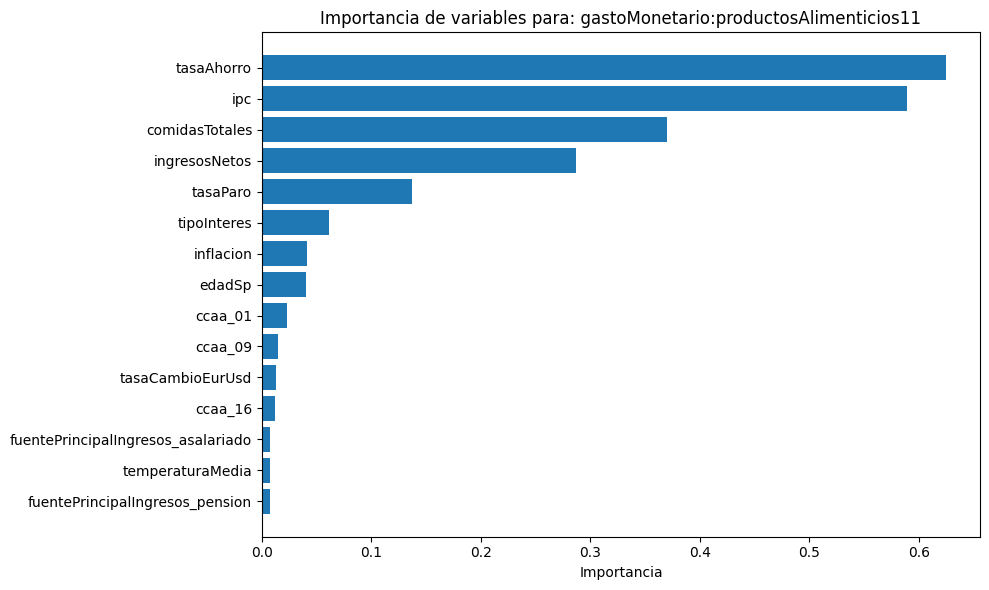

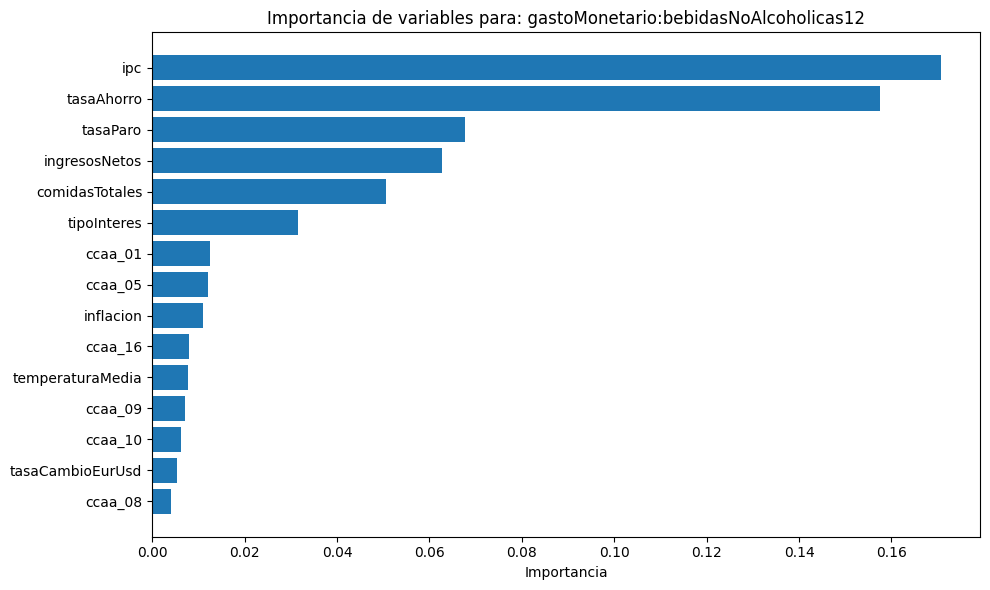

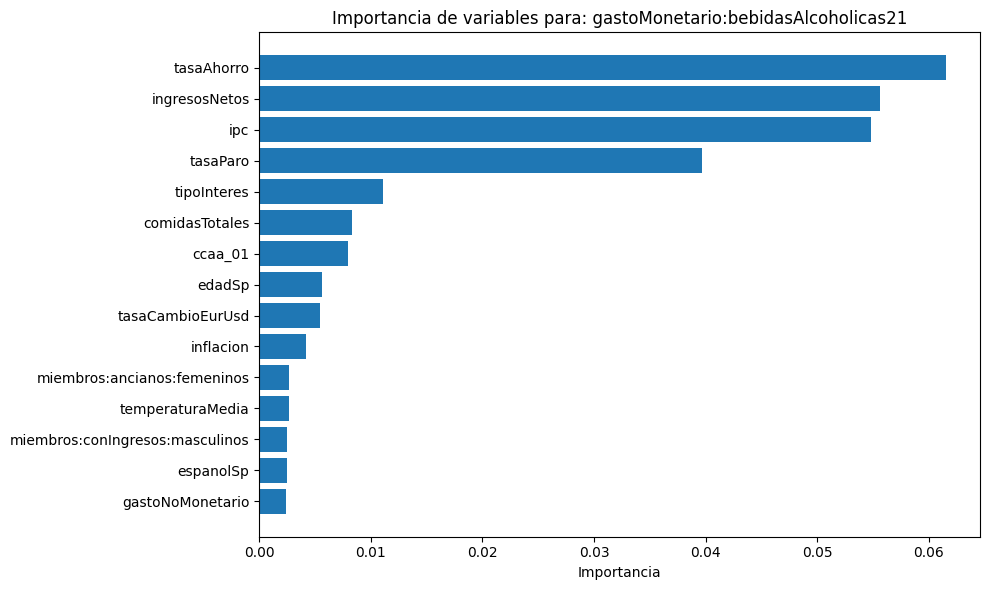

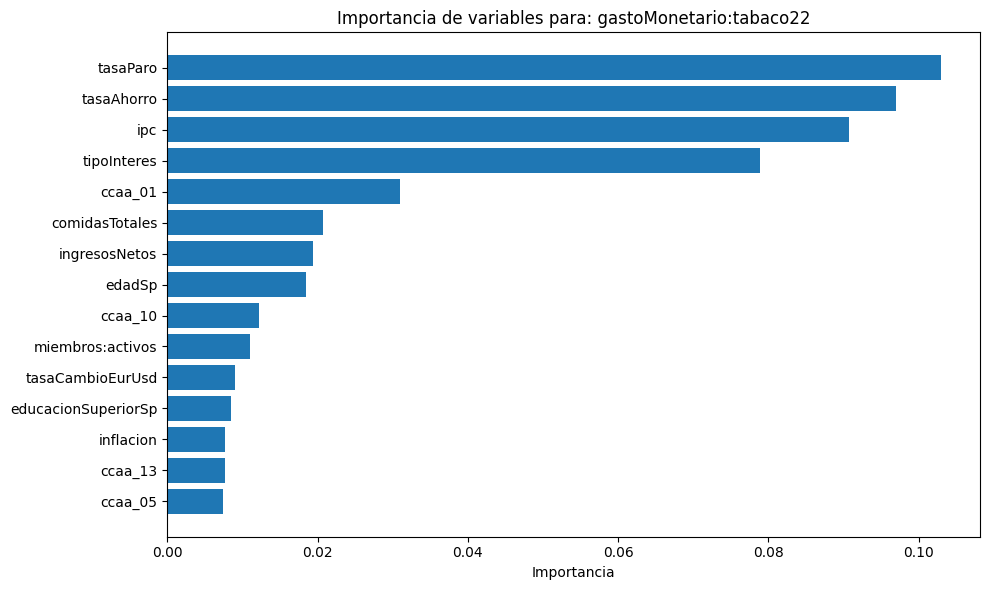

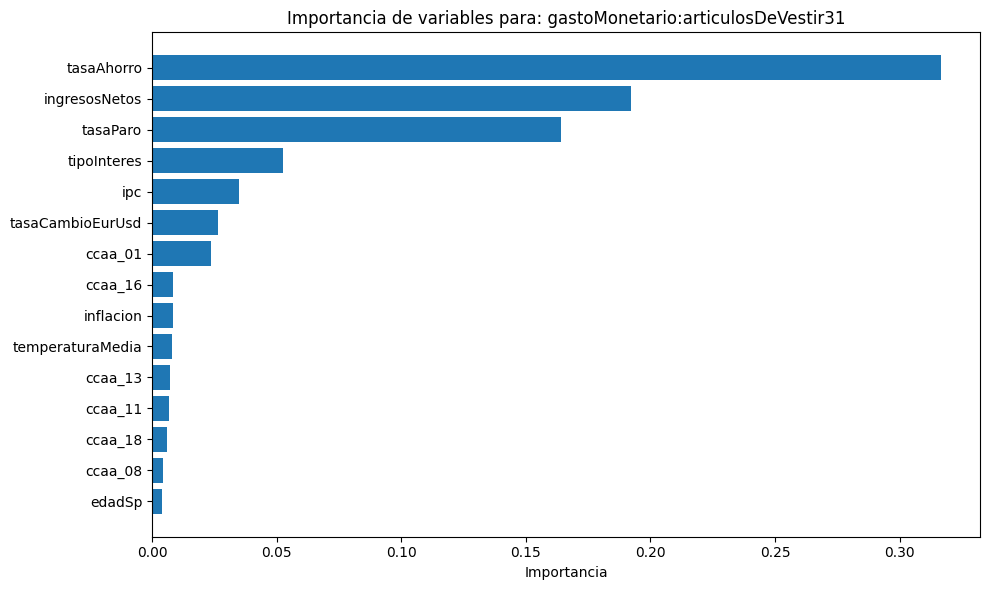

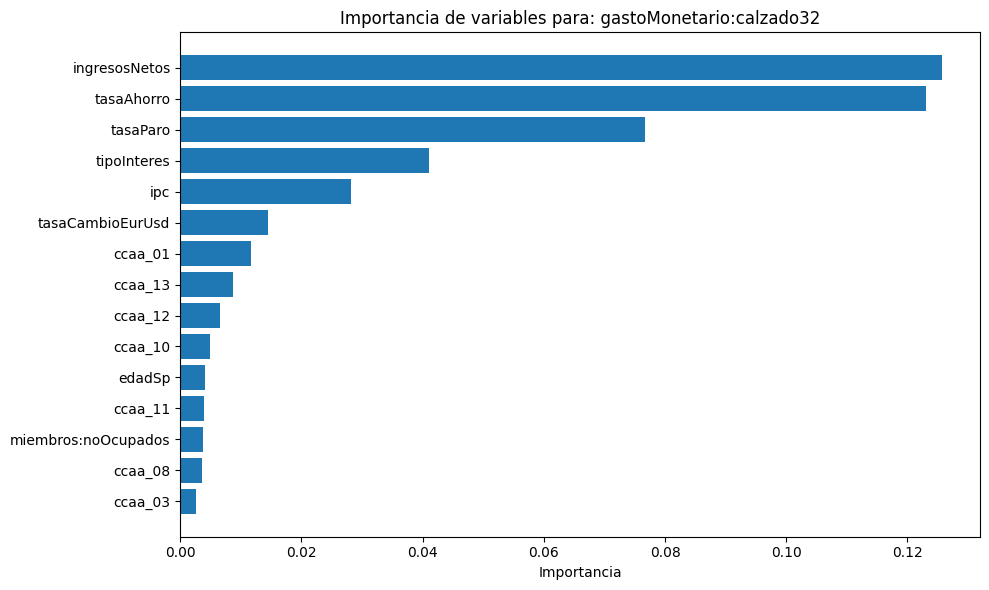

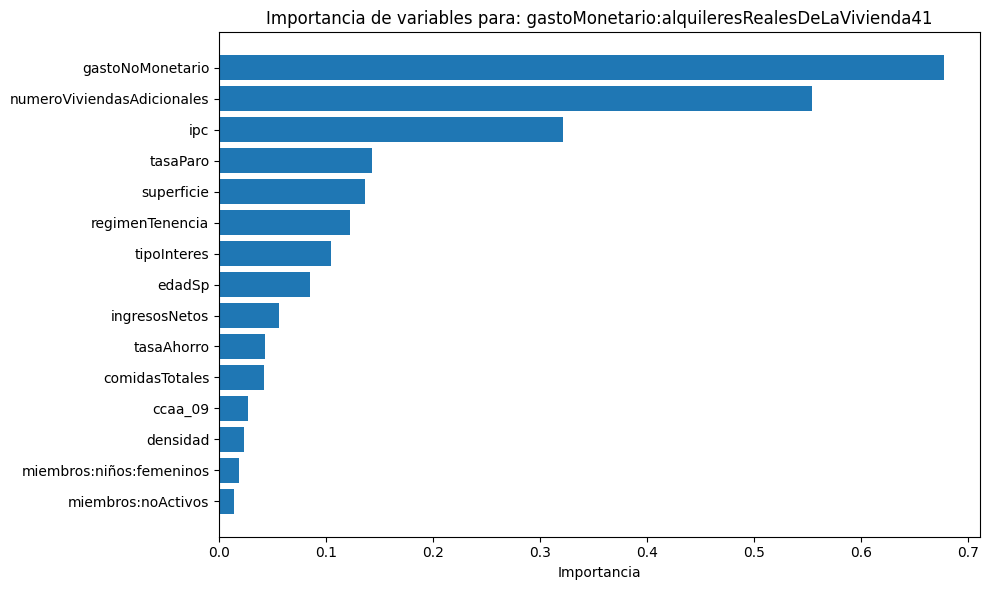

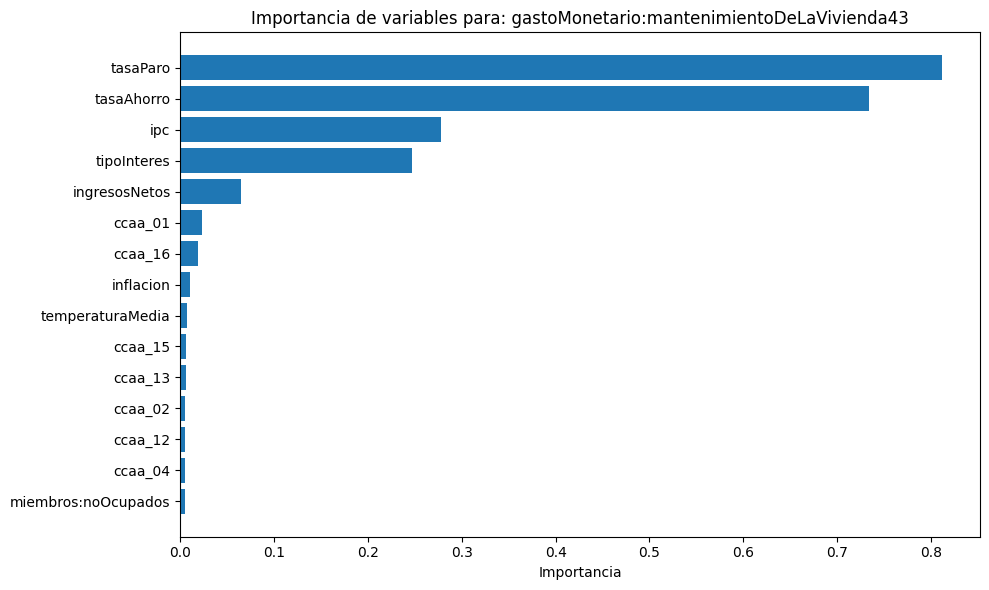

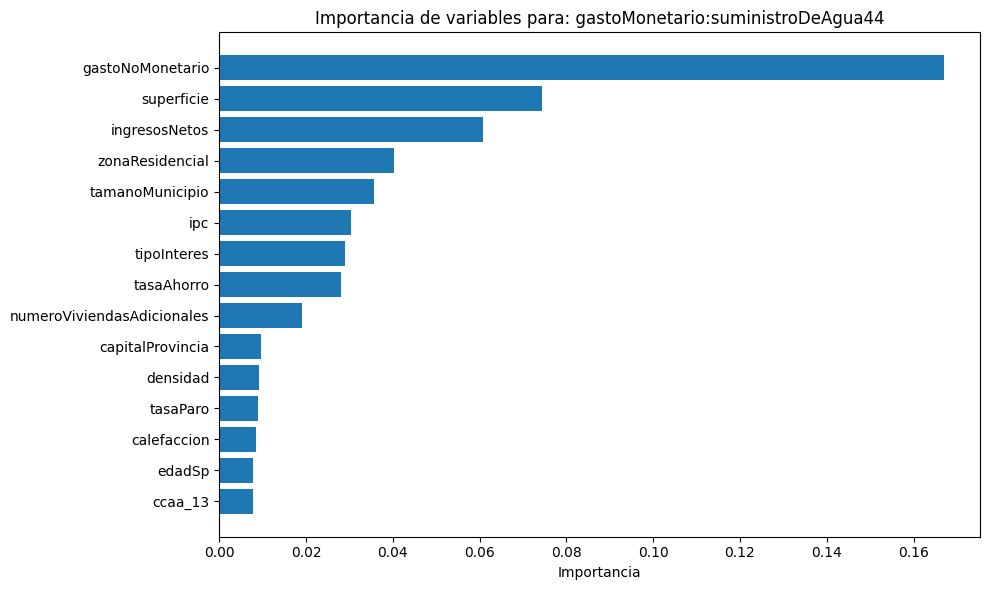

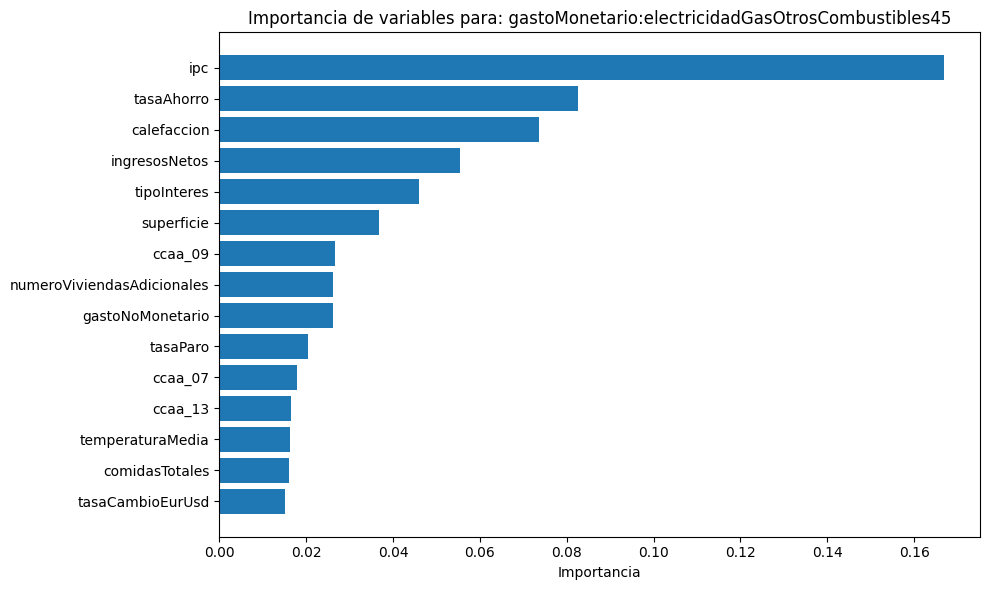

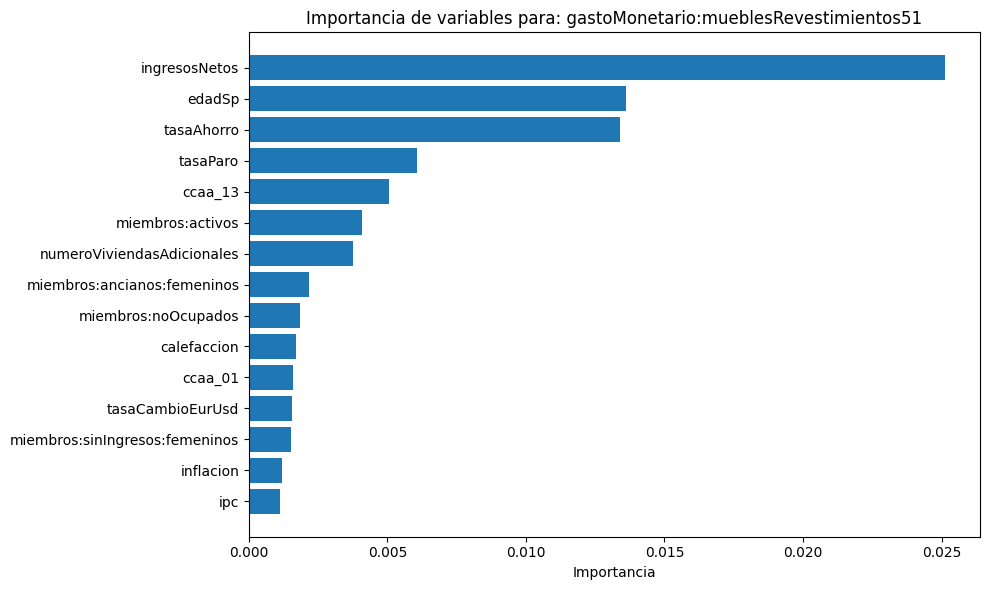

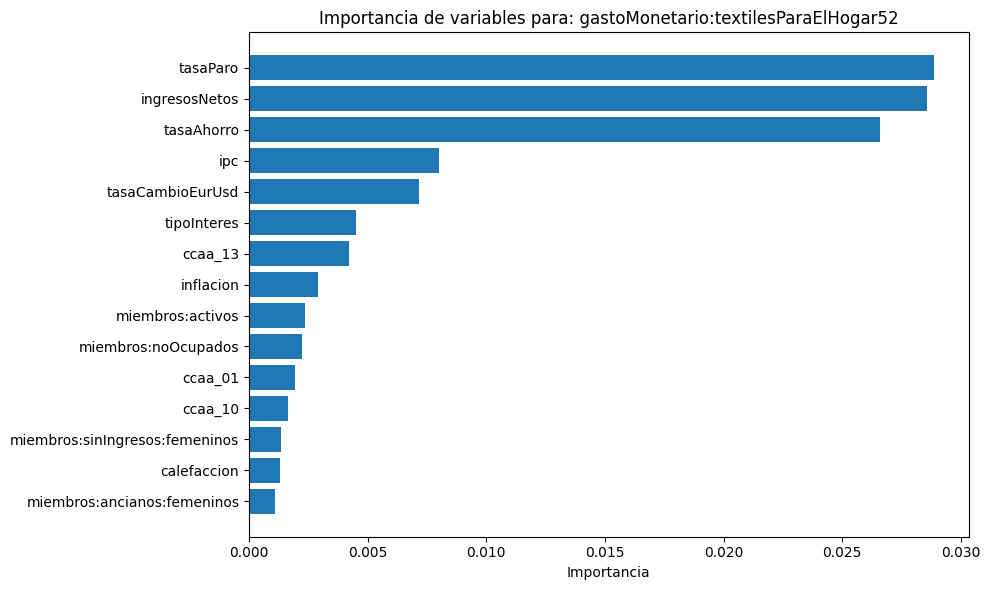

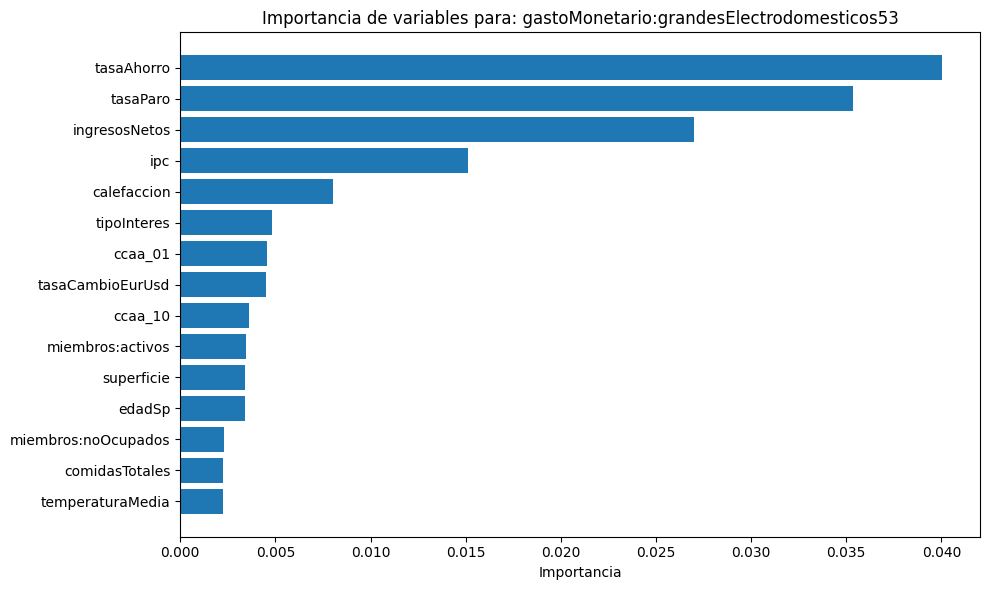

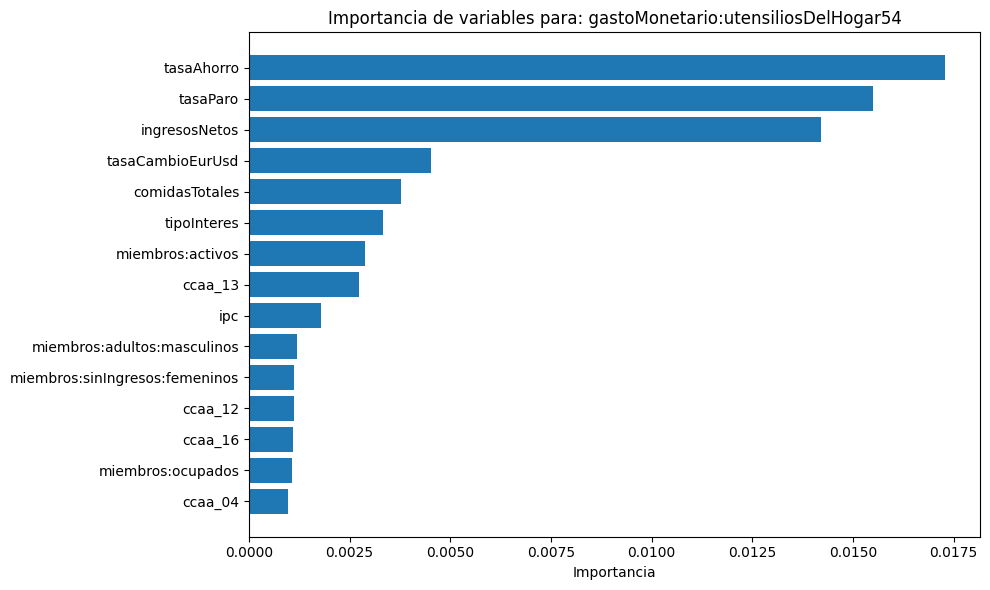

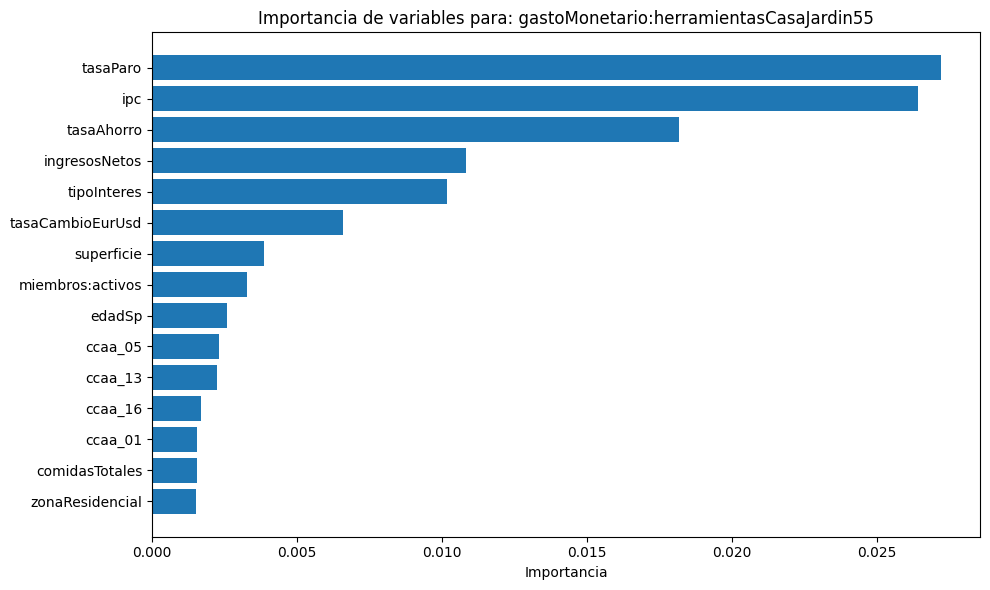

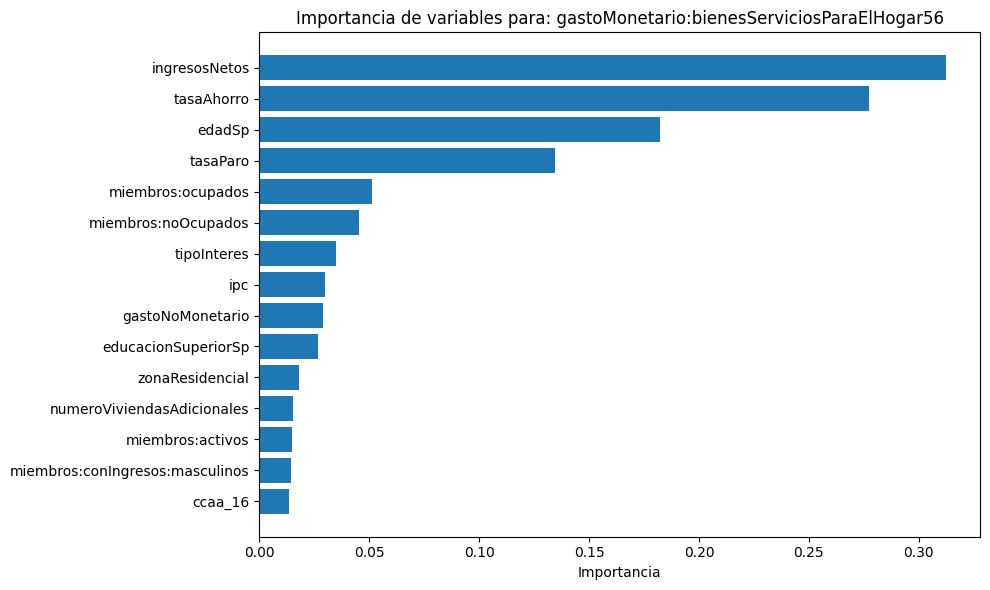

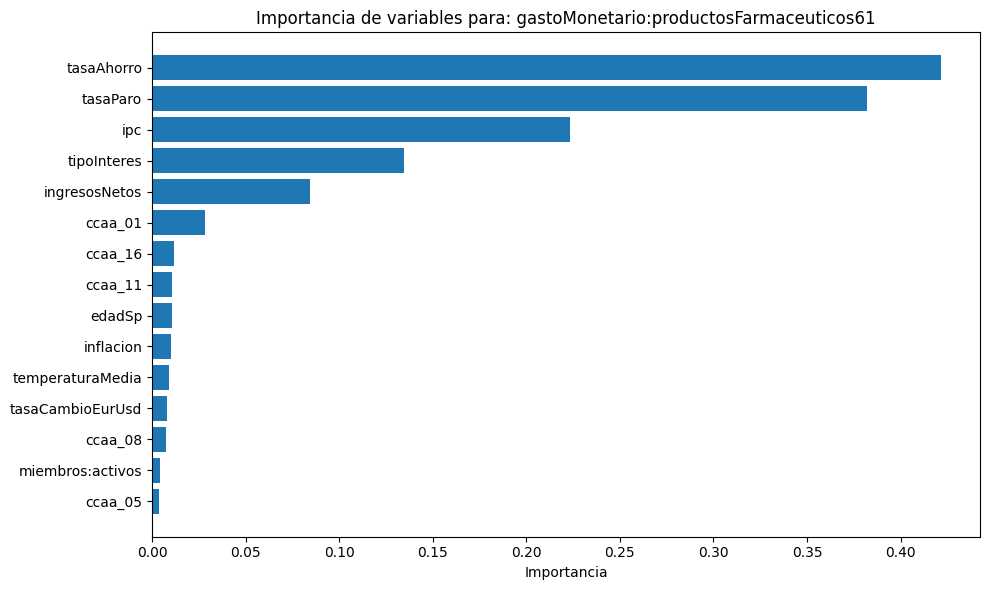

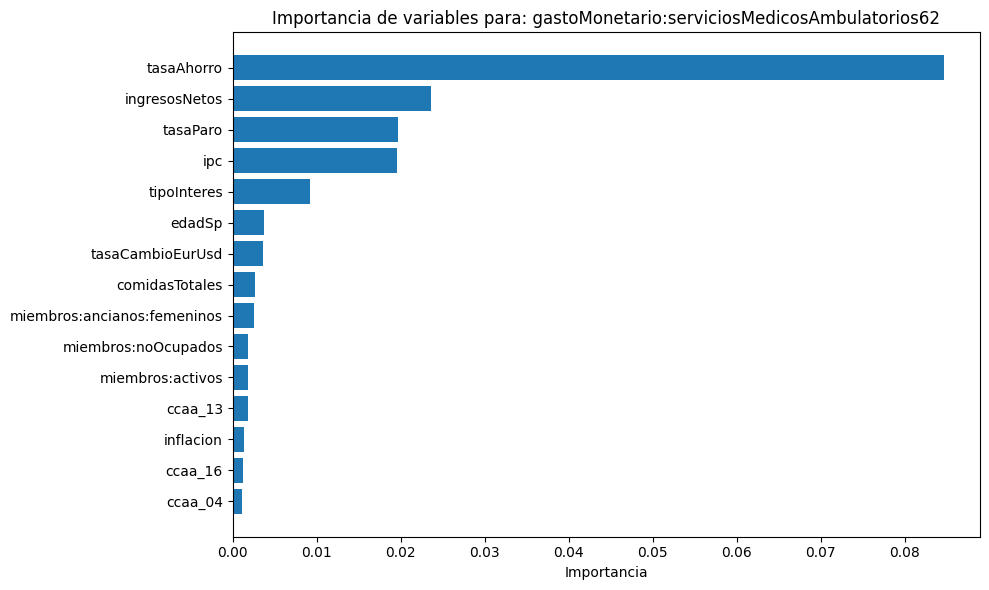

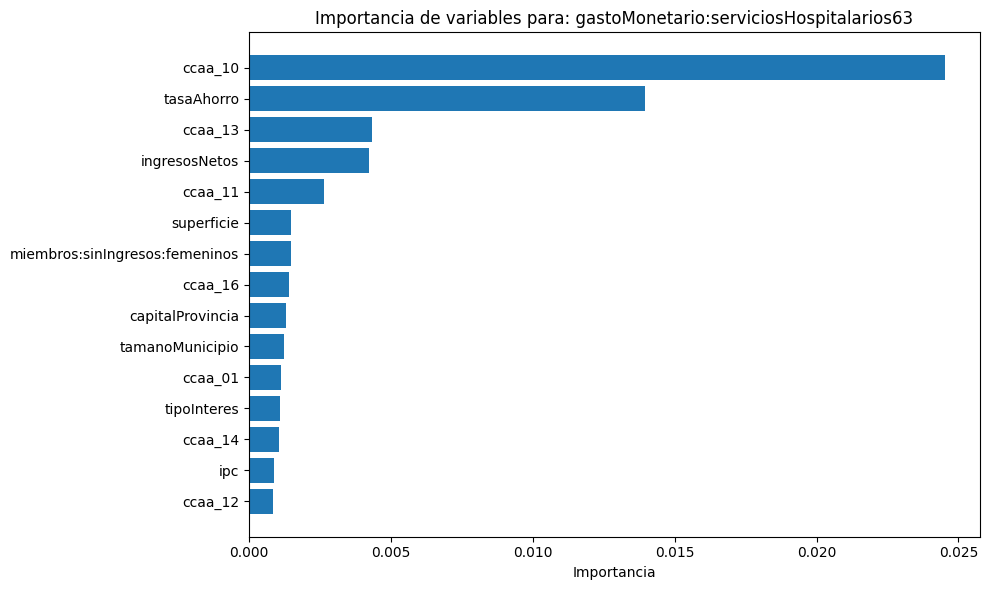

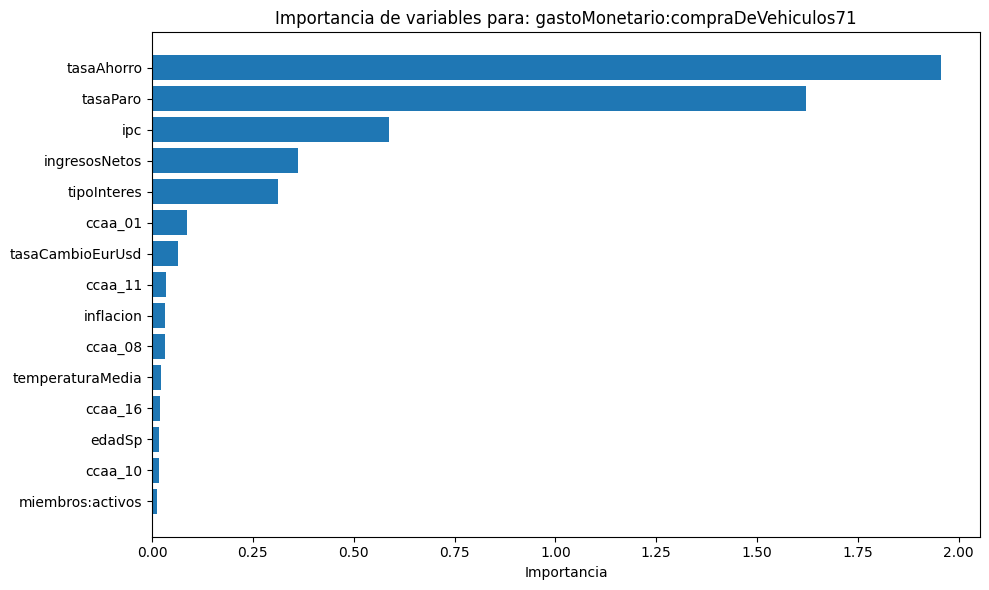

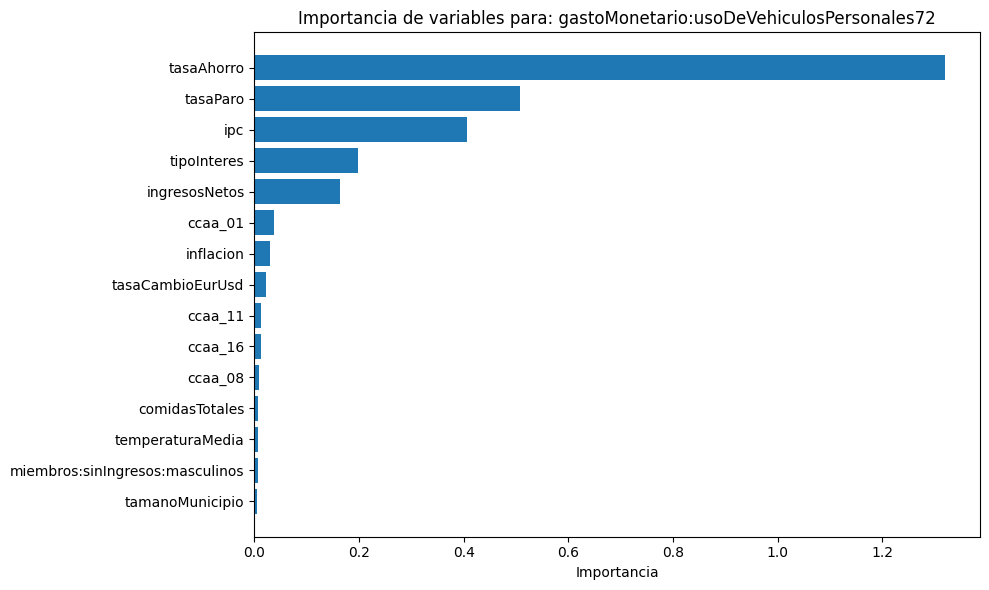

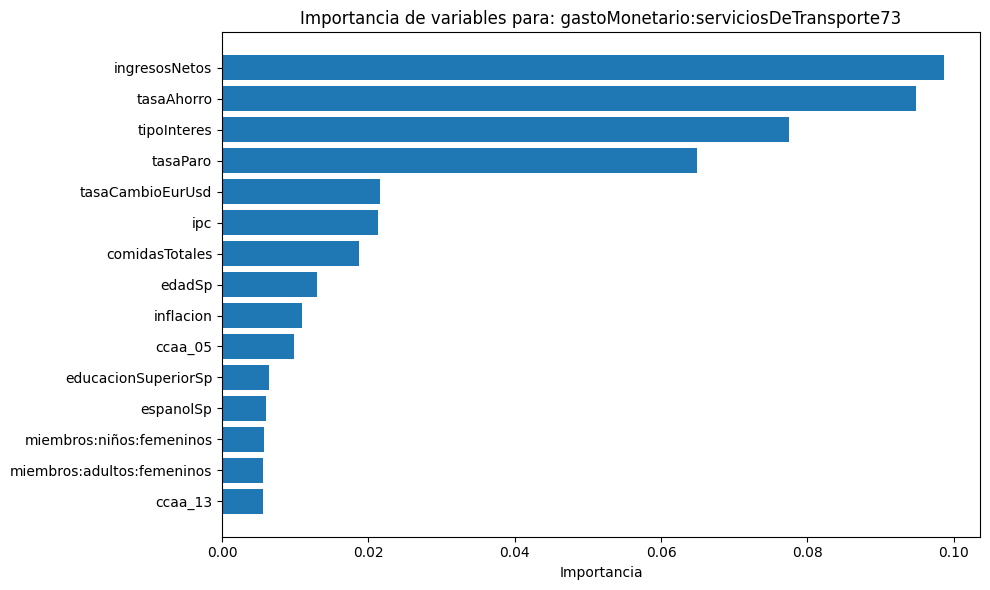

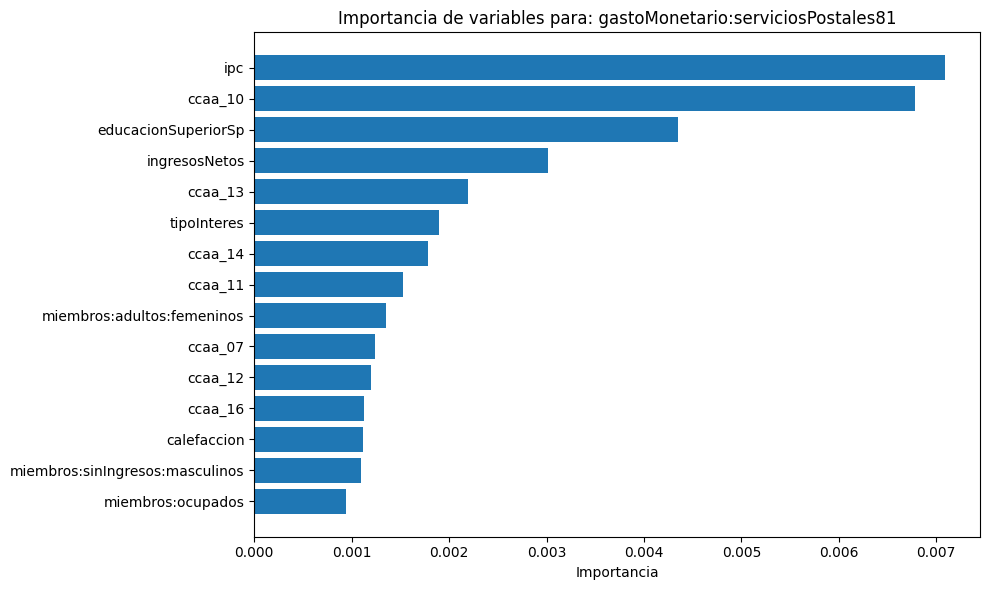

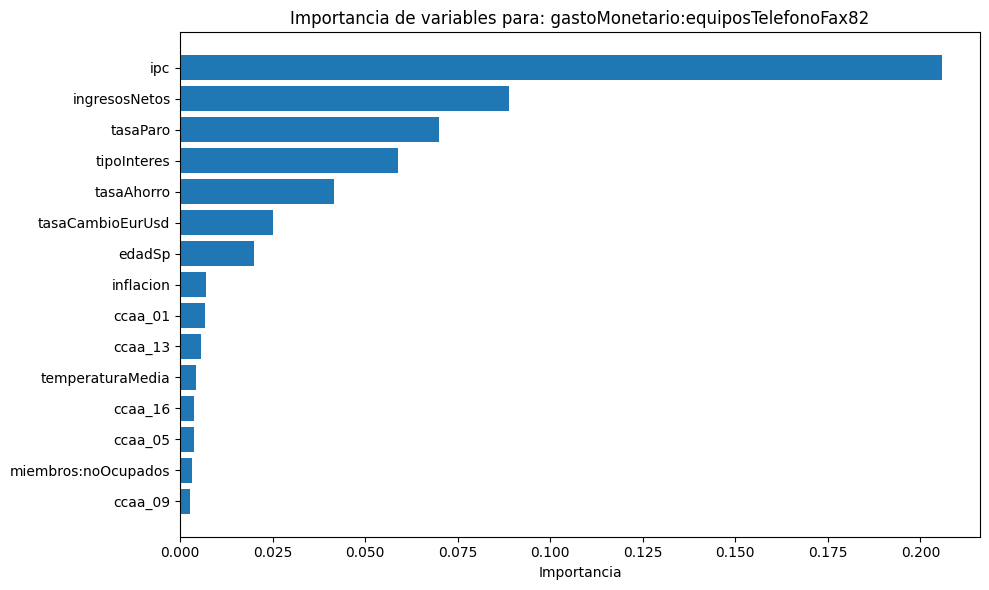

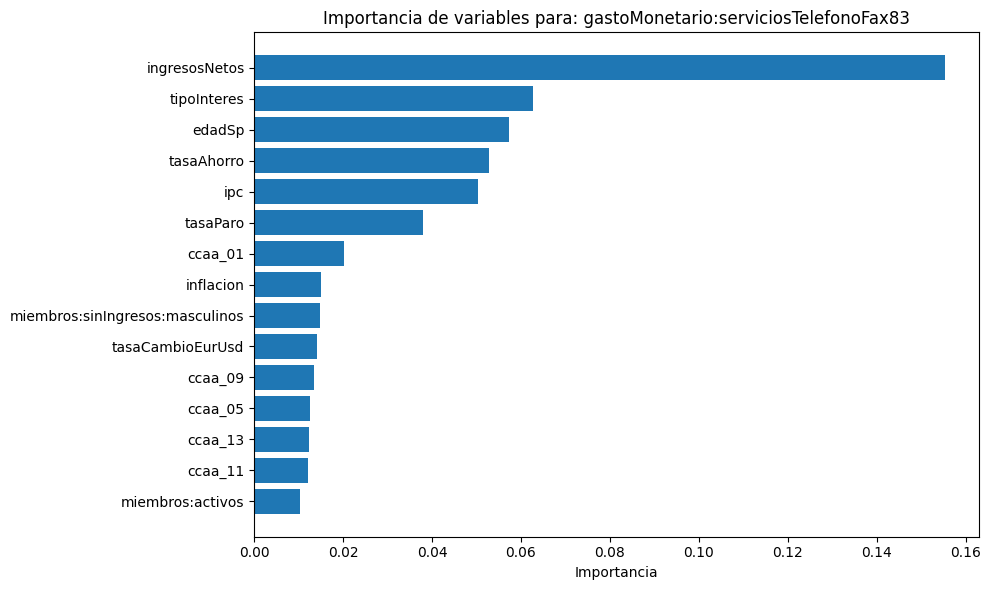

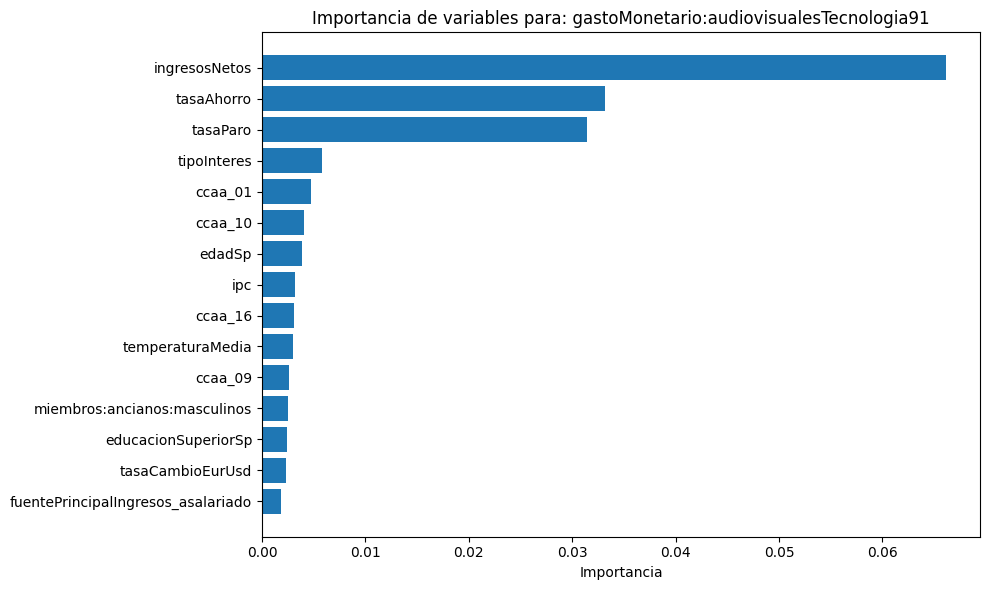

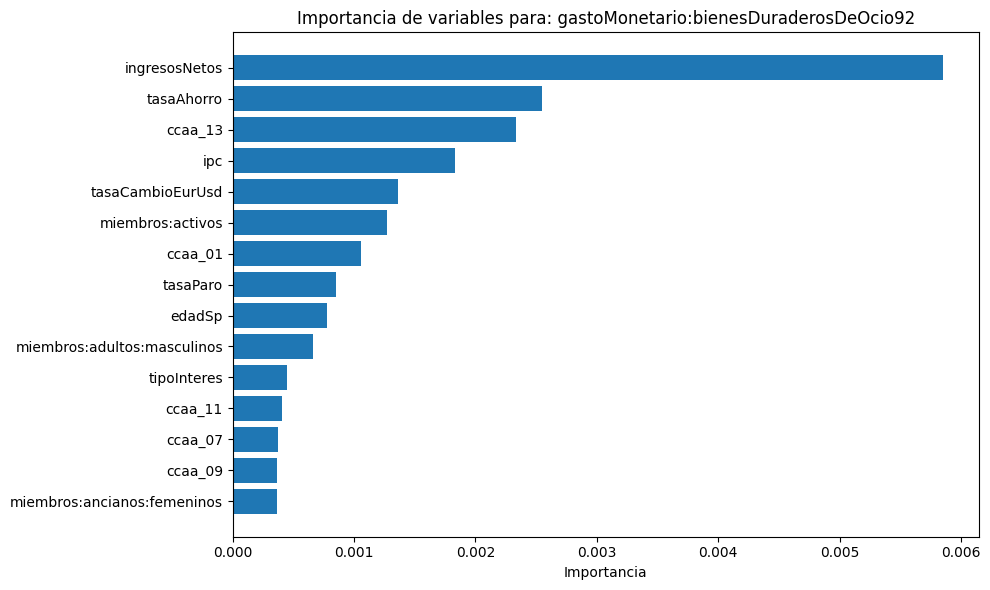

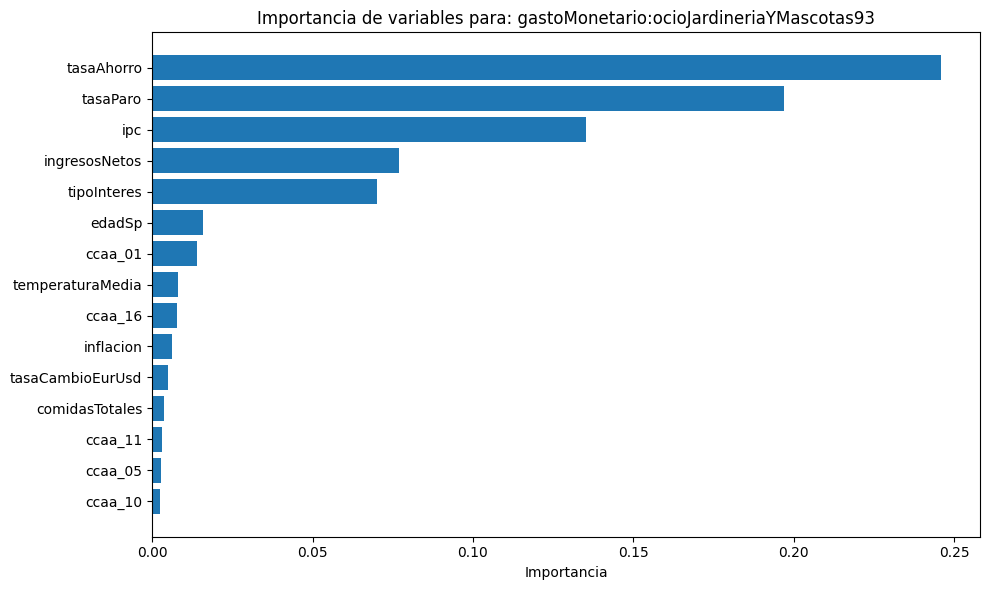

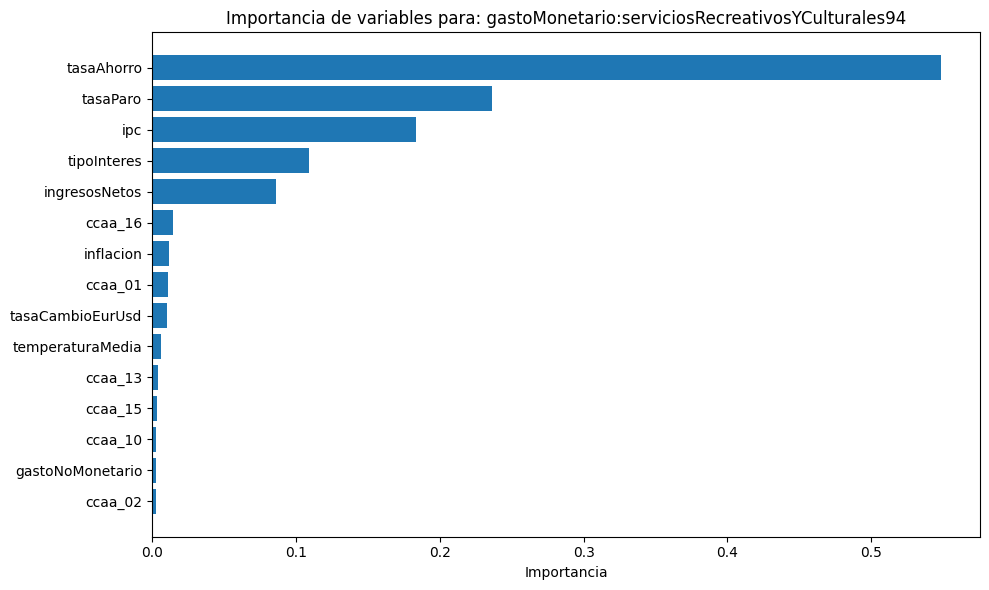

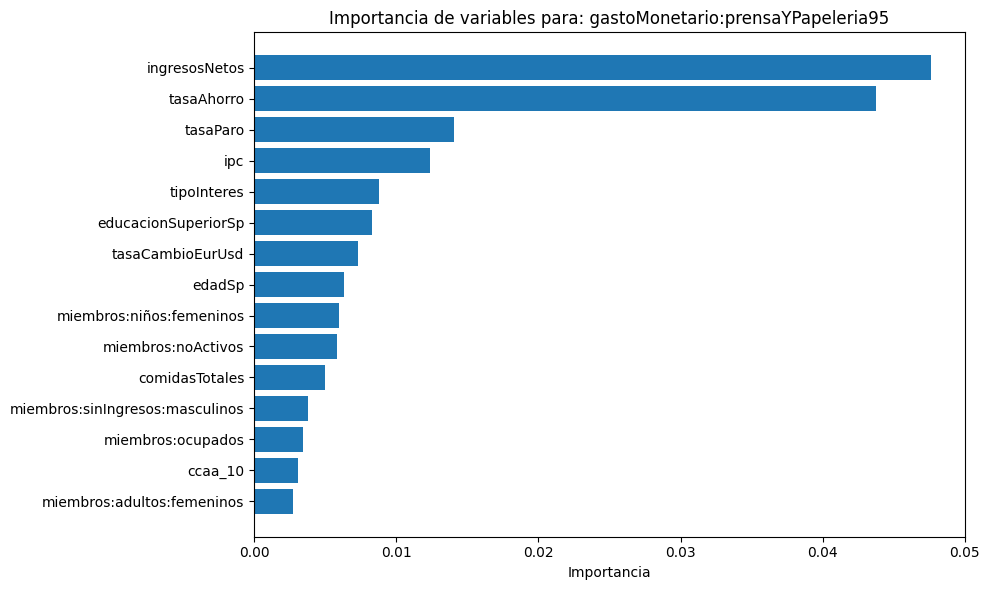

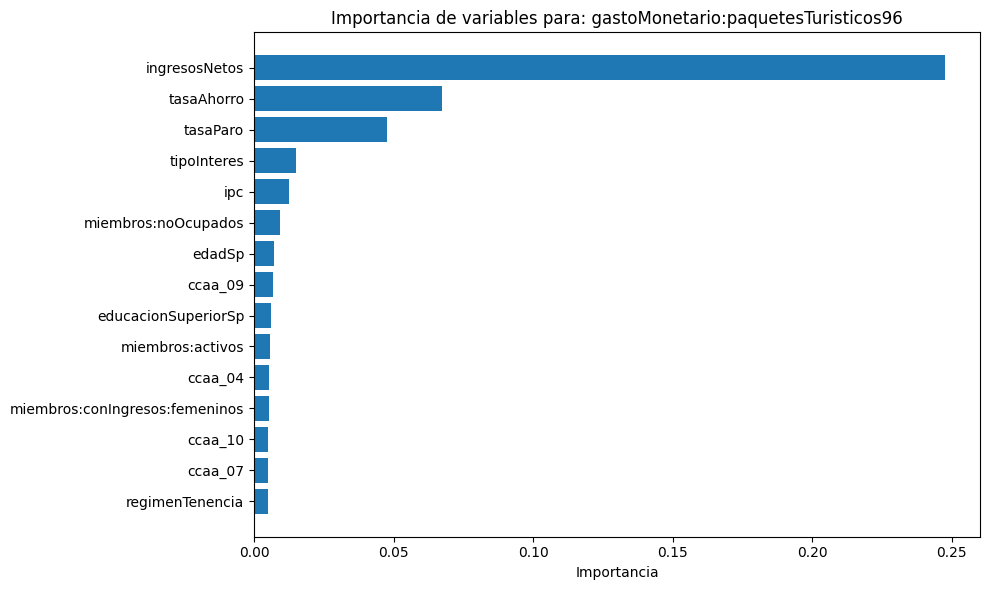

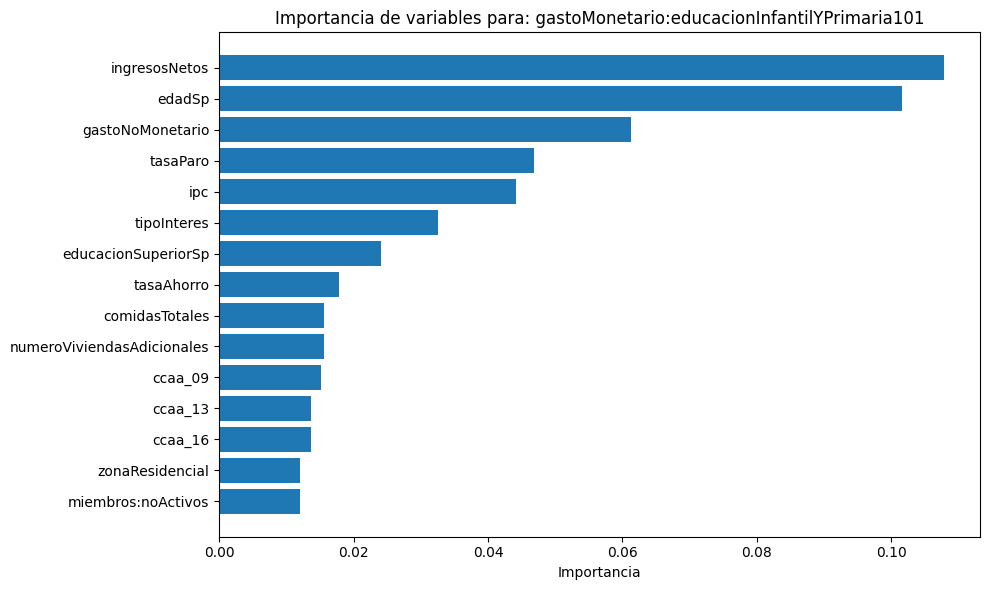

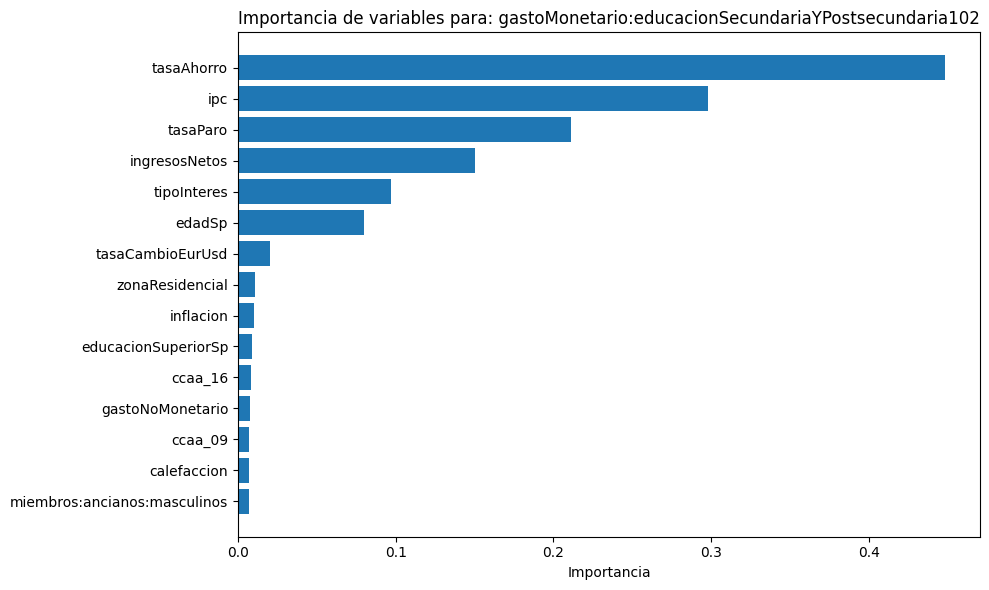

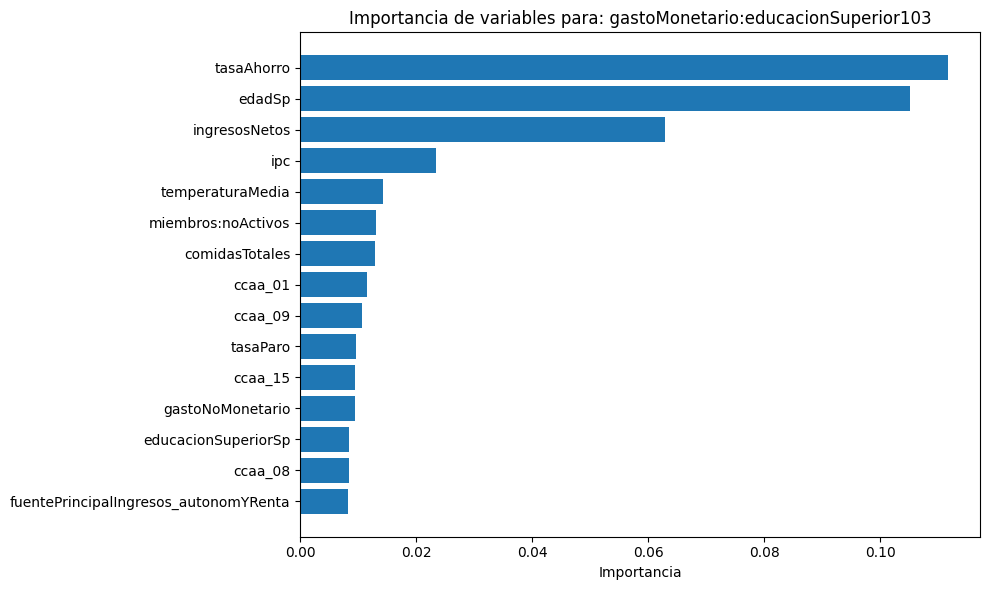

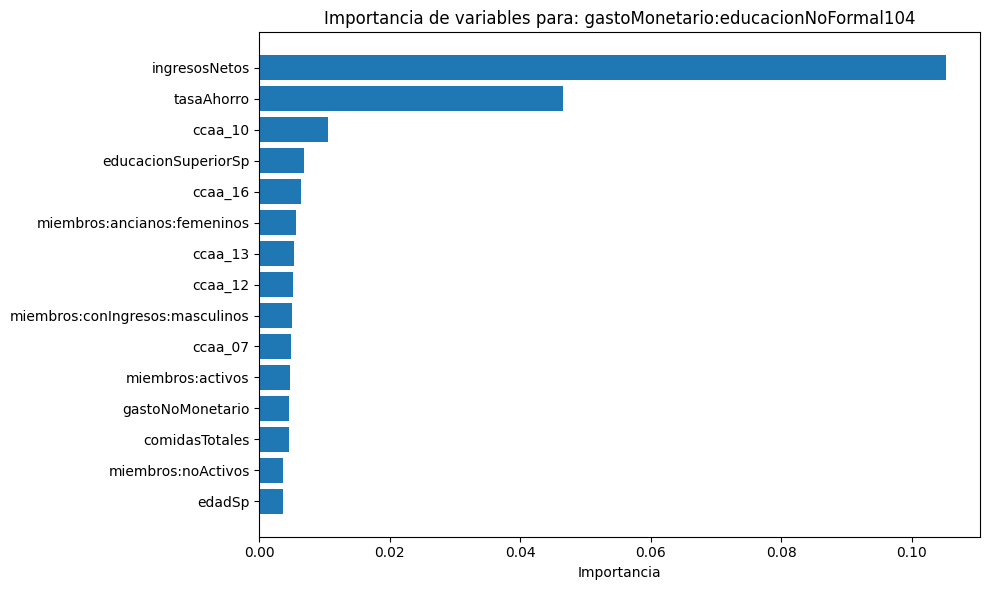

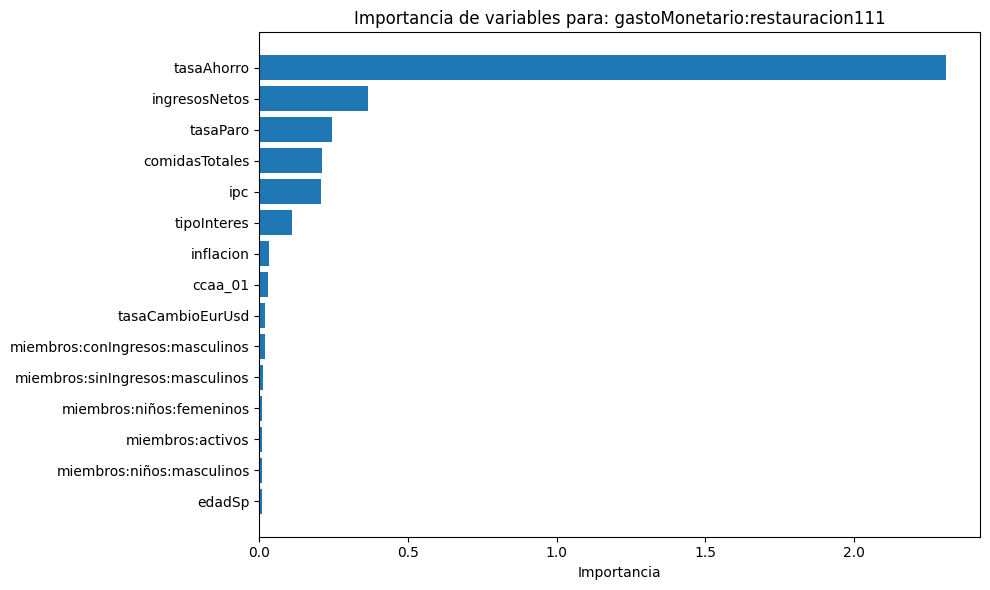

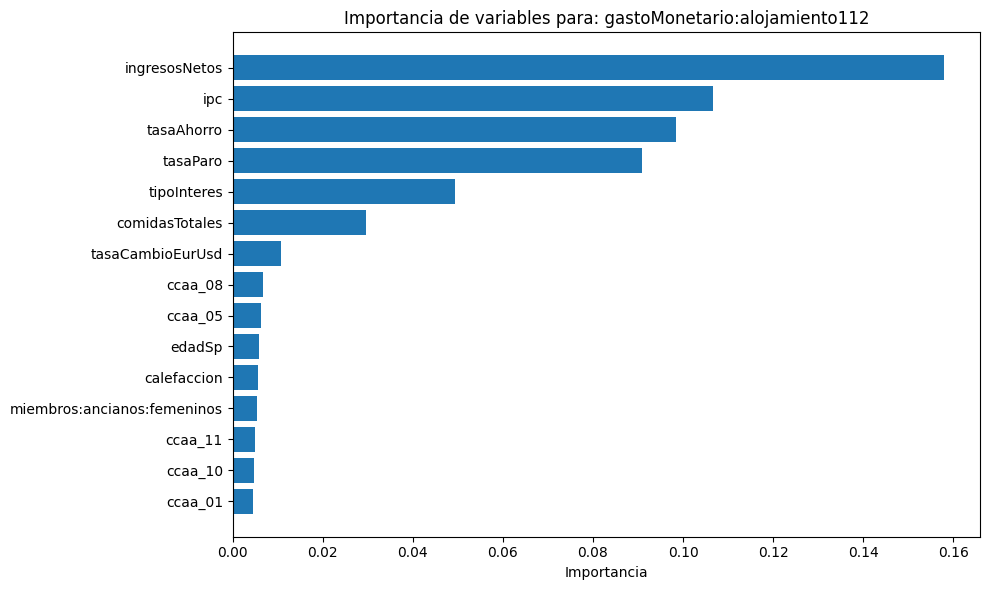

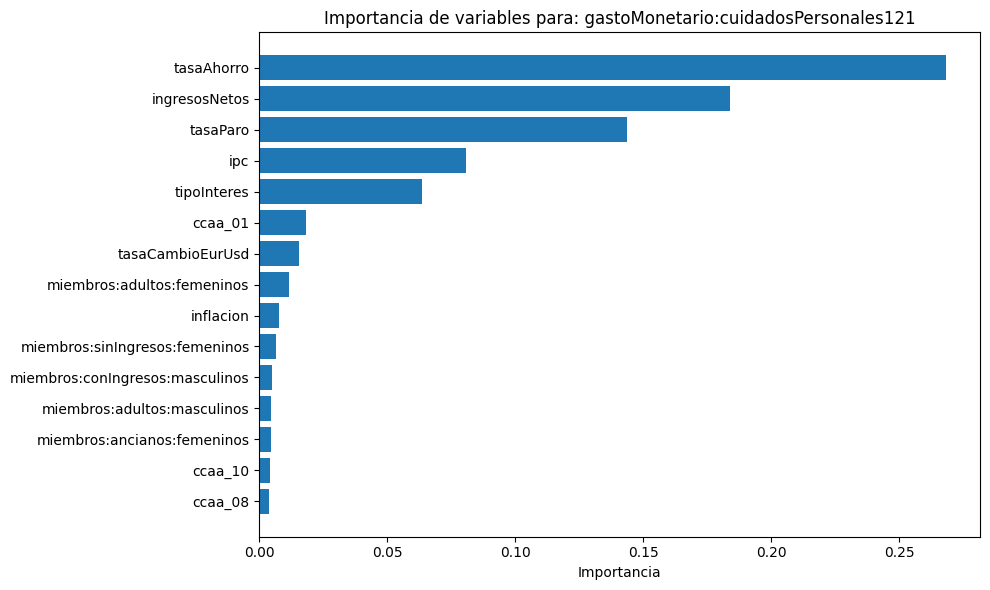

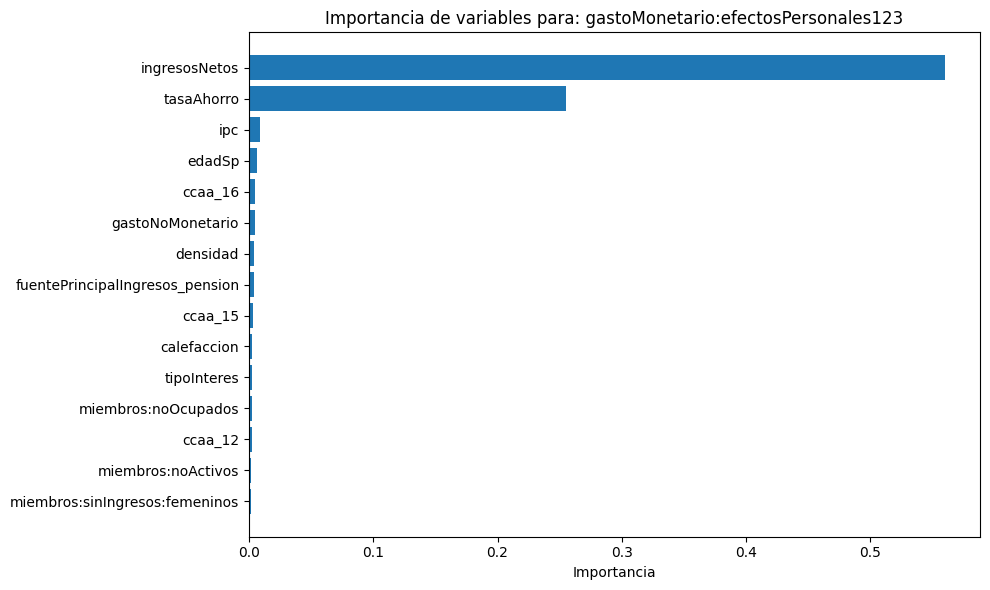

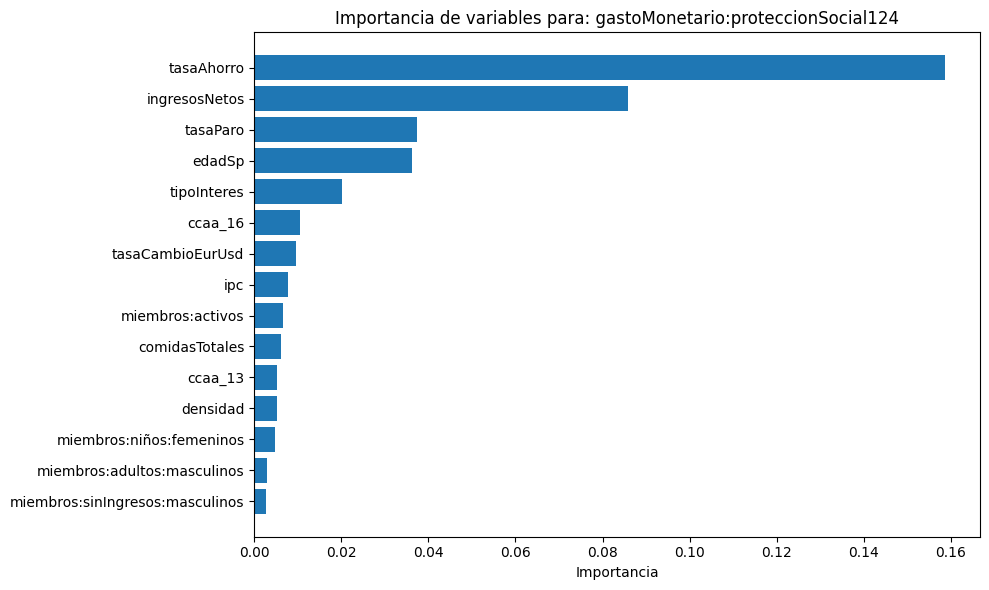

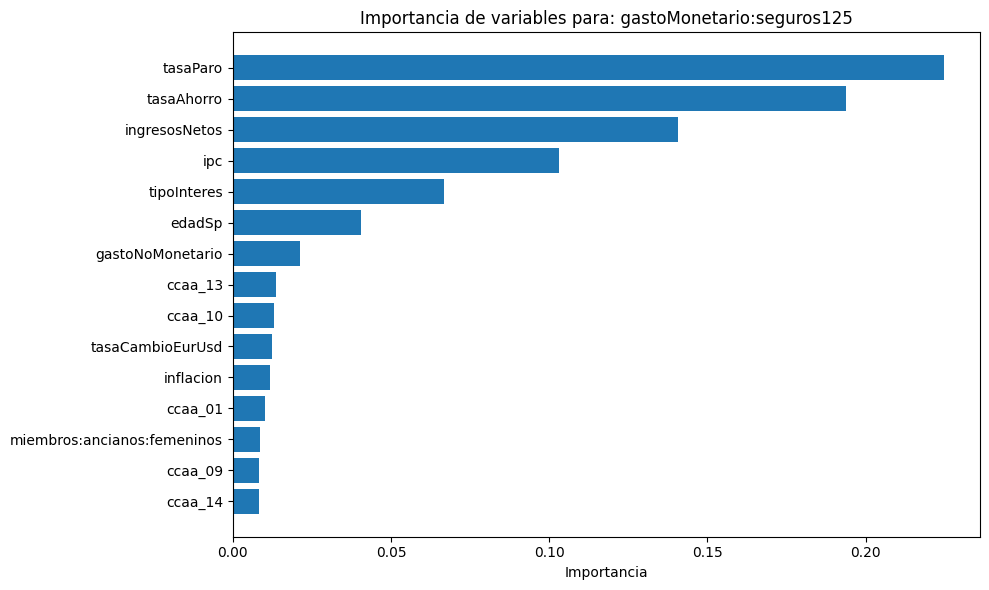

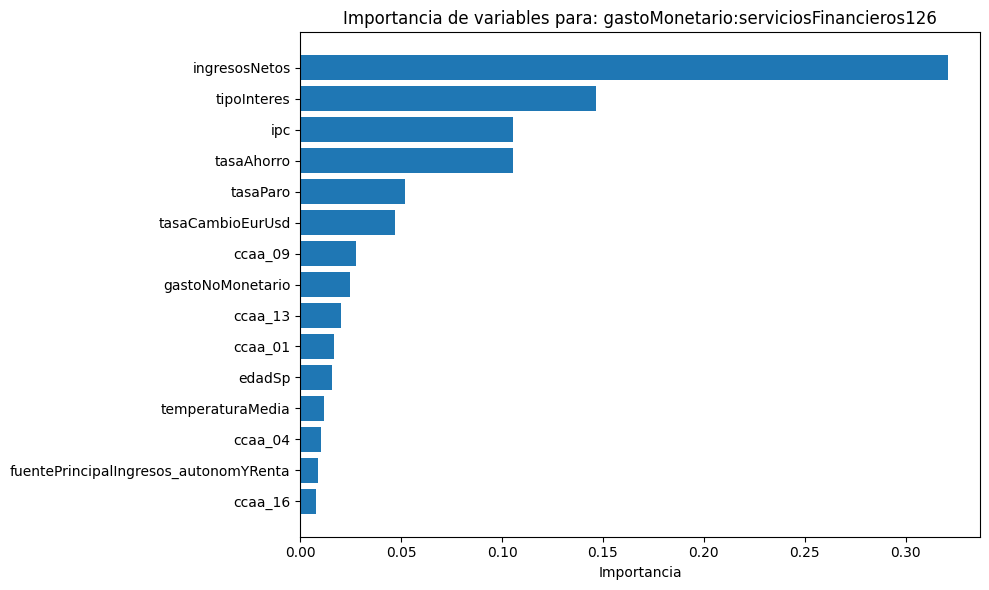

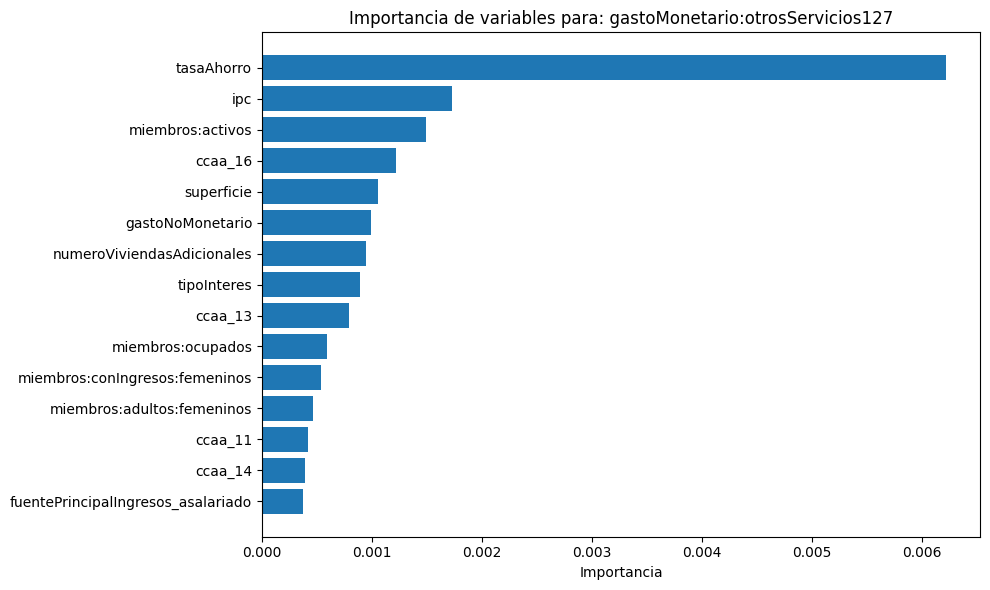

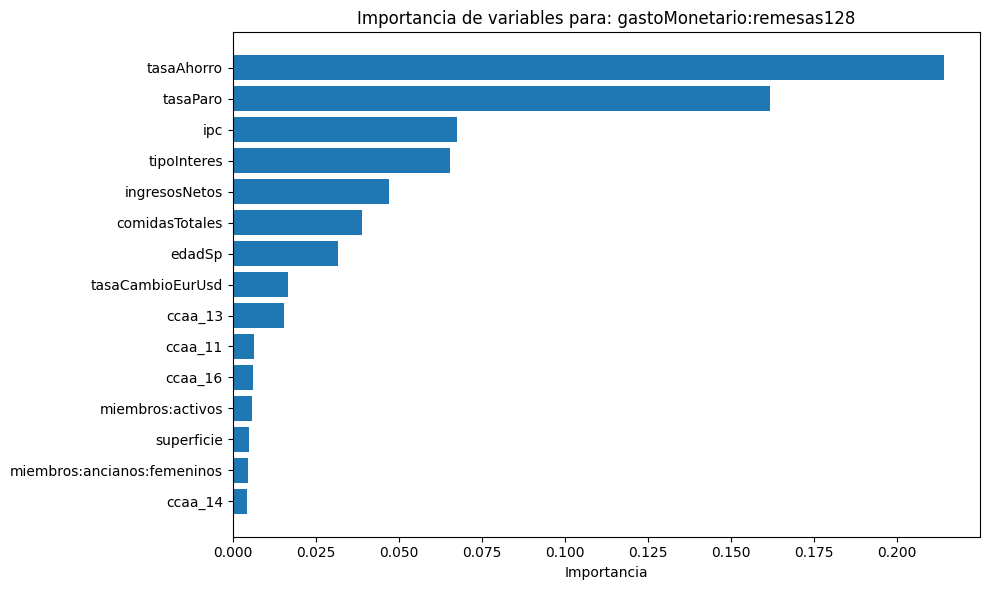

In [15]:
plot_feature_importances_by_target(mlp_importances_df)

In [16]:
# Save the coefficients DataFrame to a TSV file
mlp_importances_df.to_csv("../../datamarts/impotancia_por_categoria_no_lineal.tsv", sep="\t", index=True)

In [17]:
# Save the r2 DataFrame to a CSV file
mlp_r2_df.to_csv("../../datamarts/r2_por_categoria_no_lineal.tsv", sep="\t", index=False)

In [18]:
mlp_importances_df

Variable  Importance  \
0                      tasaAhorro    0.624604   
1                             ipc    0.588716   
2                  comidasTotales    0.370244   
3                   ingresosNetos    0.286513   
4                        tasaParo    0.137353   
...                           ...         ...   
2547                 aguaCaliente   -0.000079   
2548                      ccaa_03   -0.000168   
2549  miembros:adultos:masculinos   -0.000523   
2550             gastoNoMonetario   -0.000812   
2551             capitalProvincia   -0.000989   

                                      Target  
0     gastoMonetario:productosAlimenticios11  
1     gastoMonetario:productosAlimenticios11  
2     gastoMonetario:productosAlimenticios11  
3     gastoMonetario:productosAlimenticios11  
4     gastoMonetario:productosAlimenticios11  
...                                      ...  
2547               gastoMonetario:remesas128  
2548               gastoMonetario:remesas128  
2549               gastoMonetario:remesas128  
2550               gastoMonetario:remesas128  
2551               gastoMonetario:remesas128  

[2552 rows x 3 columns]

In [19]:
# ^Pivotear el DataFrame para que cada target tenga su propia columna de importancias
importances_pivoted = mlp_importances_df.pivot(index='Variable', columns='Target', values='Importance').reset_index()
importances_pivoted

Target                               Variable  gastoMonetario:alojamiento112  \
0                                aguaCaliente                      -0.000017   
1                                 calefaccion                       0.005696   
2                            capitalProvincia                       0.001115   
3                                     ccaa_01                       0.004512   
4                                     ccaa_02                       0.001694   
5                                     ccaa_03                       0.001060   
6                                     ccaa_04                       0.004300   
7                                     ccaa_05                       0.006248   
8                                     ccaa_06                       0.000060   
9                                     ccaa_07                       0.002406   
10                                    ccaa_08                       0.006640   
11                                    ccaa_09                       0.002974   
12                                    ccaa_10                       0.004793   
13                                    ccaa_11                       0.005003   
14                                    ccaa_12                       0.003308   
15                                    ccaa_13                       0.003087   
16                                    ccaa_14                       0.000928   
17                                    ccaa_15                       0.000634   
18                                    ccaa_16                       0.000078   
19                                    ccaa_17                       0.002250   
20                                    ccaa_18                       0.000840   
21                                    ccaa_19                       0.001372   
22                             comidasTotales                       0.029661   
23                                   densidad                       0.002429   
24                                     edadSp                       0.005839   
25                        educacionSuperiorSp                       0.003418   
26                                  espanolSp                       0.001127   
27         fuentePrincipalIngresos_asalariado                       0.002293   
28      fuentePrincipalIngresos_autonomYRenta                       0.002299   
29            fuentePrincipalIngresos_pension                       0.002288   
30                           gastoNoMonetario                       0.000996   
31                                  inflacion                       0.002974   
32                              ingresosNetos                       0.158037   
33                                        ipc                       0.106612   
34                           miembros:activos                       0.000301   
35                 miembros:adultos:femeninos                       0.000620   
36                miembros:adultos:masculinos                       0.001049   
37                miembros:ancianos:femeninos                       0.005491   
38               miembros:ancianos:masculinos                       0.000382   
39             miembros:conIngresos:femeninos                       0.000470   
40            miembros:conIngresos:masculinos                       0.001463   
41                   miembros:niños:femeninos                       0.001722   
42                  miembros:niños:masculinos                       0.000112   
43                         miembros:noActivos                       0.004463   
44                        miembros:noOcupados                       0.002846   
45                          miembros:ocupados                      -0.000097   
46             miembros:sinIngresos:femeninos                       0.001029   
47            miembros:sinIngresos:masculinos                       0.001917   
48                 numeroViviendasAdicionales                       0.004378   


### Mapa de calor de los coeficientes por código

In [20]:
import seaborn as sns

In [35]:
import re

def renombrar_columnas_por_codigo(df, ignore_cols=None):
    """
    Renombra las columnas extrayendo el código numérico de su final
    (p. ej. de 'gastoMonetario:alojamiento112' deja '112', etc.),
    pero omite renombrar cualquier columna cuyo nombre esté en ignore_cols.
    
    Parámetros:
    - df: DataFrame de pandas.
    - ignore_cols: lista de nombres de columnas a excluir (por defecto ['variable']).
    """
    if ignore_cols is None:
        ignore_cols = ['Variable']
        
    patron = re.compile(r'(\d+)$')  

    mapping = {}
    
    for col in df.columns:
        if col in ignore_cols:
            continue
        m = patron.search(col)
        if m:
            mapping[col] = m.group(1)
    
    return df.rename(columns=mapping)


In [36]:
importances_pivoted

Target                               Variable  gastoMonetario:alojamiento112  \
0                                aguaCaliente                      -0.000017   
1                                 calefaccion                       0.005696   
2                            capitalProvincia                       0.001115   
3                                     ccaa_01                       0.004512   
4                                     ccaa_02                       0.001694   
5                                     ccaa_03                       0.001060   
6                                     ccaa_04                       0.004300   
7                                     ccaa_05                       0.006248   
8                                     ccaa_06                       0.000060   
9                                     ccaa_07                       0.002406   
10                                    ccaa_08                       0.006640   
11                                    ccaa_09                       0.002974   
12                                    ccaa_10                       0.004793   
13                                    ccaa_11                       0.005003   
14                                    ccaa_12                       0.003308   
15                                    ccaa_13                       0.003087   
16                                    ccaa_14                       0.000928   
17                                    ccaa_15                       0.000634   
18                                    ccaa_16                       0.000078   
19                                    ccaa_17                       0.002250   
20                                    ccaa_18                       0.000840   
21                                    ccaa_19                       0.001372   
22                             comidasTotales                       0.029661   
23                                   densidad                       0.002429   
24                                     edadSp                       0.005839   
25                        educacionSuperiorSp                       0.003418   
26                                  espanolSp                       0.001127   
27         fuentePrincipalIngresos_asalariado                       0.002293   
28      fuentePrincipalIngresos_autonomYRenta                       0.002299   
29            fuentePrincipalIngresos_pension                       0.002288   
30                           gastoNoMonetario                       0.000996   
31                                  inflacion                       0.002974   
32                              ingresosNetos                       0.158037   
33                                        ipc                       0.106612   
34                           miembros:activos                       0.000301   
35                 miembros:adultos:femeninos                       0.000620   
36                miembros:adultos:masculinos                       0.001049   
37                miembros:ancianos:femeninos                       0.005491   
38               miembros:ancianos:masculinos                       0.000382   
39             miembros:conIngresos:femeninos                       0.000470   
40            miembros:conIngresos:masculinos                       0.001463   
41                   miembros:niños:femeninos                       0.001722   
42                  miembros:niños:masculinos                       0.000112   
43                         miembros:noActivos                       0.004463   
44                        miembros:noOcupados                       0.002846   
45                          miembros:ocupados                      -0.000097   
46             miembros:sinIngresos:femeninos                       0.001029   
47            miembros:sinIngresos:masculinos                       0.001917   
48                 numeroViviendasAdicionales                       0.004378   


In [47]:
def generar_mapa_calor_importancias(df, figsize=(22, 14), vmax=0.05, output_path=None):
    """
    Genera un mapa de calor con las columnas (códigos de gasto) ordenadas numéricamente.
    
    Args:
        df (pd.DataFrame): DataFrame con variables como filas y categorías como columnas.
        figsize (tuple): Tamaño de la figura.
        vmax (float): Valor máximo para la escala de color.
        output_path (str): Ruta opcional para guardar el mapa.
    """
    df_codificado = renombrar_columnas_por_codigo(df.copy())
    data = df_codificado.drop(columns=["Target", "Variable"], errors="ignore")
    data.index = df_codificado["Variable"] if "Variable" in df_codificado.columns else df_codificado.index

    # Reordenar columnas por valor numérico del código
    columnas_ordenadas = sorted(data.columns, key=lambda x: float(x.replace("_", ".")))
    data = data[columnas_ordenadas]

    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        data,
        cmap="Reds",
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        linecolor="gray",
        vmin=0,
        vmax=vmax,
        cbar_kws={"label": "Importancia relativa"}
    )

    plt.title("Mapa de calor de importancias por variable y categoría de gasto", fontsize=14)
    plt.xlabel("Código de Categoría de Gasto")
    plt.ylabel("Variable")
    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, dpi=300)
    plt.show()

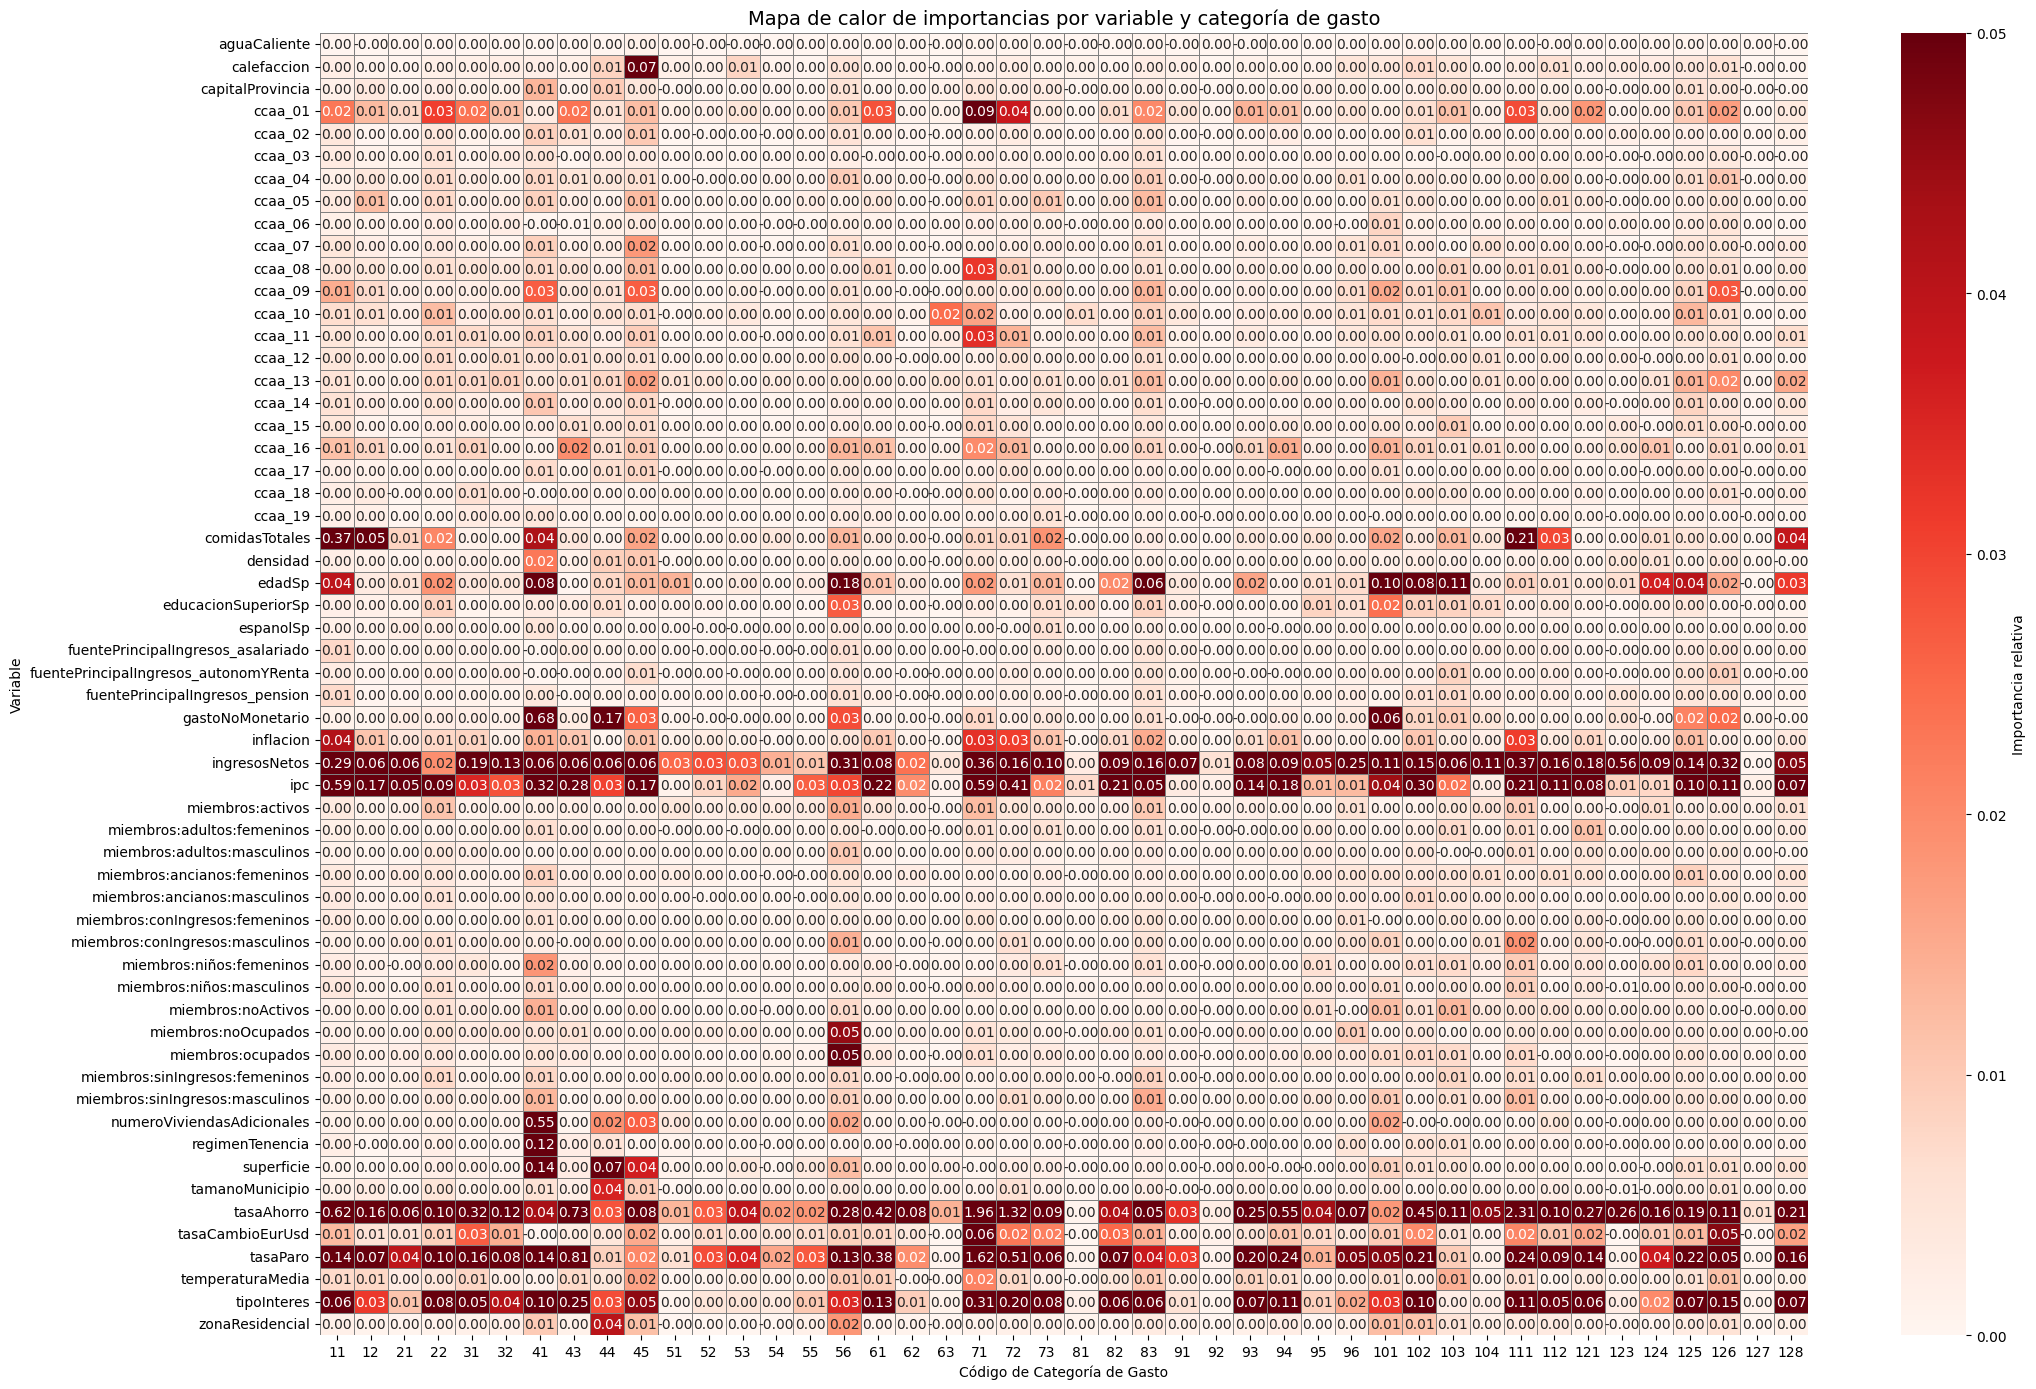

In [48]:
generar_mapa_calor_importancias(importances_pivoted)